In [30]:
import pandas as pd

# List the file names for the three days
files = [
    'prices_round_3_day_0.csv',
    'prices_round_3_day_1.csv',
    'prices_round_3_day_2.csv'
]

# Load each CSV file from the directory and store the DataFrames in a list
dfs = [pd.read_csv(f'./round-3-island-data-bottle/{file}', delimiter=';') for file in files]

# Concatenate all DataFrames into one, resetting the index
df_all = pd.concat(dfs, ignore_index=True)

# Display the first few rows of the combined DataFrame
print(df_all.head())

   day  timestamp                      product  bid_price_1  bid_volume_1  \
0    0          0  VOLCANIC_ROCK_VOUCHER_10500         99.0          19.0   
1    0          0                      DJEMBES      13493.0          72.0   
2    0          0                   CROISSANTS       4321.0         111.0   
3    0          0                         JAMS       6631.0         210.0   
4    0          0  VOLCANIC_ROCK_VOUCHER_10000        505.0          19.0   

   bid_price_2  bid_volume_2  bid_price_3  bid_volume_3  ask_price_1  \
0          NaN           NaN          NaN           NaN          100   
1          NaN           NaN          NaN           NaN        13494   
2          NaN           NaN          NaN           NaN         4322   
3          NaN           NaN          NaN           NaN         6633   
4          NaN           NaN          NaN           NaN          506   

   ask_volume_1  ask_price_2  ask_volume_2  ask_price_3  ask_volume_3  \
0            19          NaN   

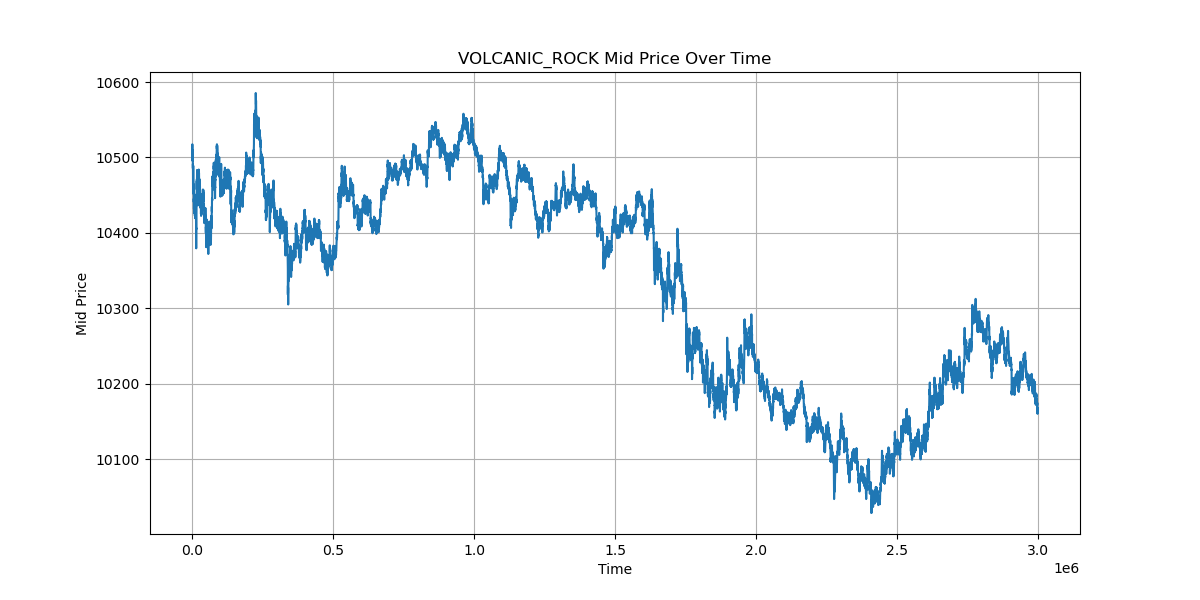

In [78]:
import matplotlib.pyplot as plt

# Filter the DataFrame for the 'VOLCANIC_ROCK' product.
volcanic_rock_prices = df_all[df_all['product'] == 'VOLCANIC_ROCK']['mid_price']

# Create the plot.
plt.figure(figsize=(12, 6))
plt.plot(volcanic_rock_prices.index, volcanic_rock_prices, linestyle='-')
plt.title('VOLCANIC_ROCK Mid Price Over Time')
plt.xlabel('Time')
plt.ylabel('Mid Price')
plt.grid(True)
plt.show()

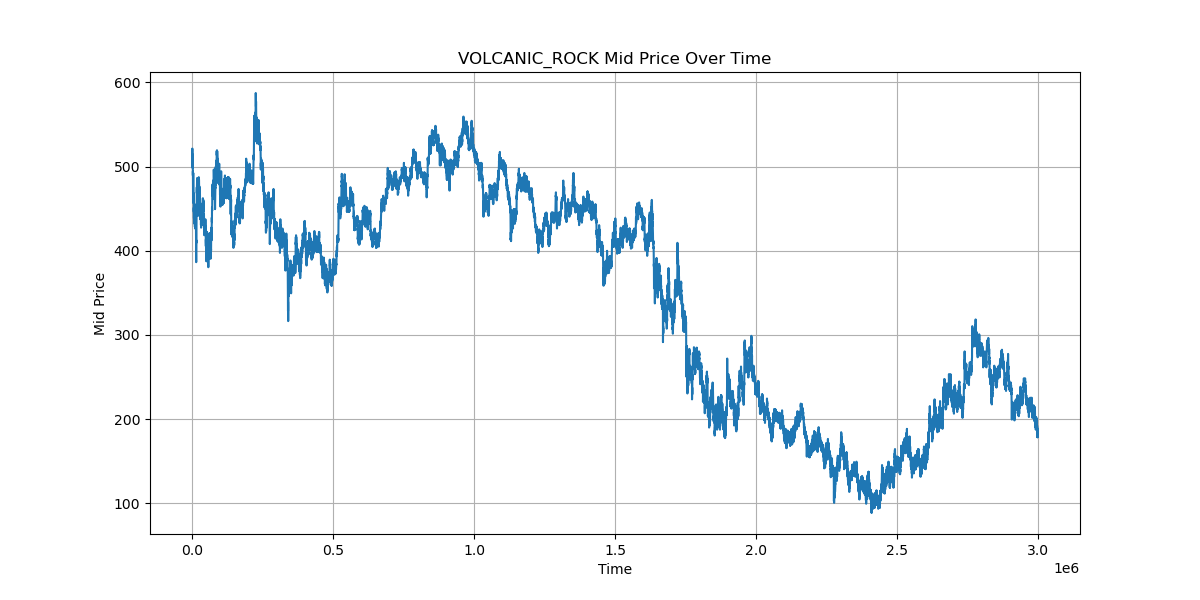

In [79]:
import matplotlib.pyplot as plt

# Filter the DataFrame for the 'VOLCANIC_ROCK' product.
volcanic_rock_prices = df_all[df_all['product'] == 'VOLCANIC_ROCK_VOUCHER_10000']['mid_price']

# Create the plot.
plt.figure(figsize=(12, 6))
plt.plot(volcanic_rock_prices.index, volcanic_rock_prices, linestyle='-')
plt.title('VOLCANIC_ROCK Mid Price Over Time')
plt.xlabel('Time')
plt.ylabel('Mid Price')
plt.grid(True)
plt.show()

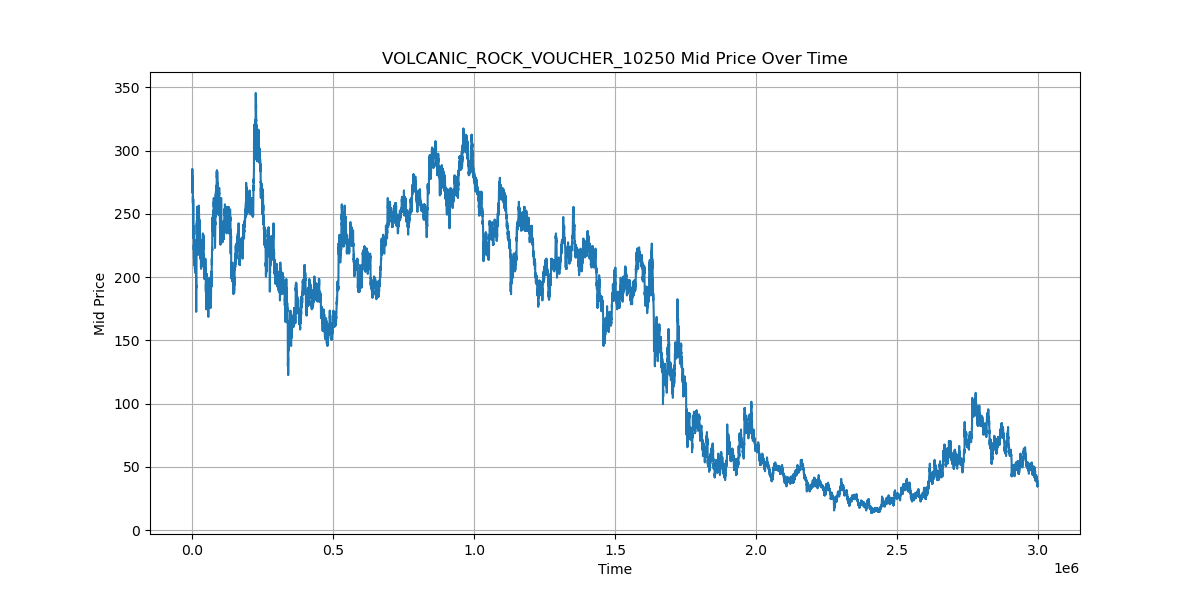

In [84]:
import matplotlib.pyplot as plt

# Filter the DataFrame for the 'VOLCANIC_ROCK' product.
volcanic_rock_prices = df_all[df_all['product'] == 'VOLCANIC_ROCK_VOUCHER_10250']['mid_price']

# Create the plot.
plt.figure(figsize=(12, 6))
plt.plot(volcanic_rock_prices.index, volcanic_rock_prices, linestyle='-')
plt.title('VOLCANIC_ROCK_VOUCHER_10250 Mid Price Over Time')
plt.xlabel('Time')
plt.ylabel('Mid Price')
plt.grid(True)
plt.show()

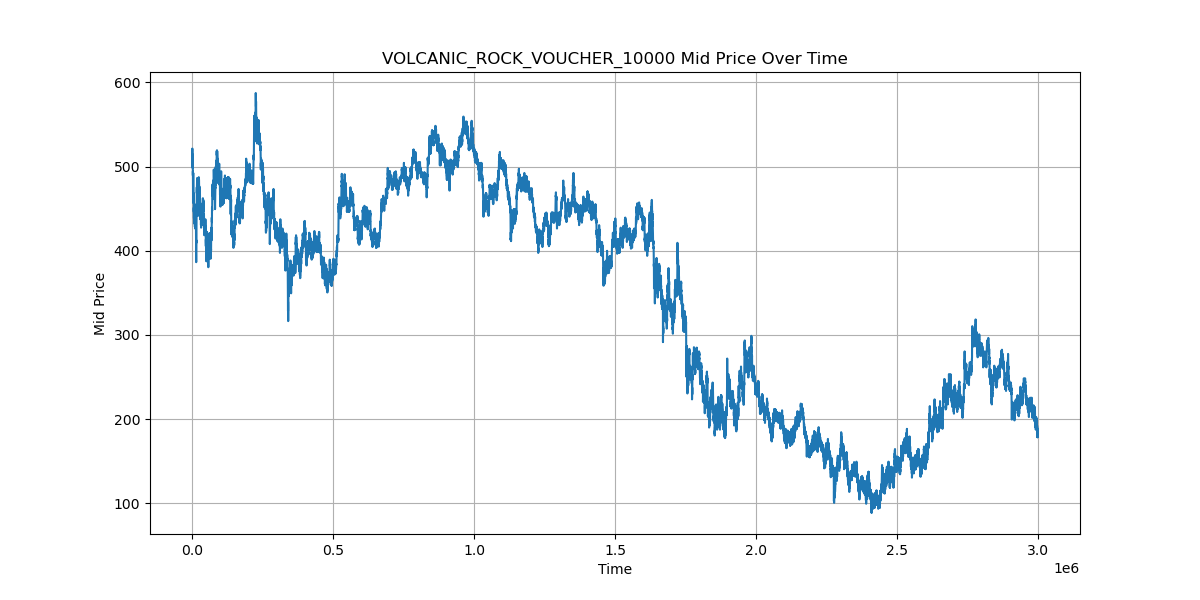

In [85]:
import matplotlib.pyplot as plt

# Filter the DataFrame for the 'VOLCANIC_ROCK' product.
volcanic_rock_prices = df_all[df_all['product'] == 'VOLCANIC_ROCK_VOUCHER_10000']['mid_price']

# Create the plot.
plt.figure(figsize=(12, 6))
plt.plot(volcanic_rock_prices.index, volcanic_rock_prices, linestyle='-')
plt.title('VOLCANIC_ROCK_VOUCHER_10000 Mid Price Over Time')
plt.xlabel('Time')
plt.ylabel('Mid Price')
plt.grid(True)
plt.show()

<Axes: xlabel='time'>

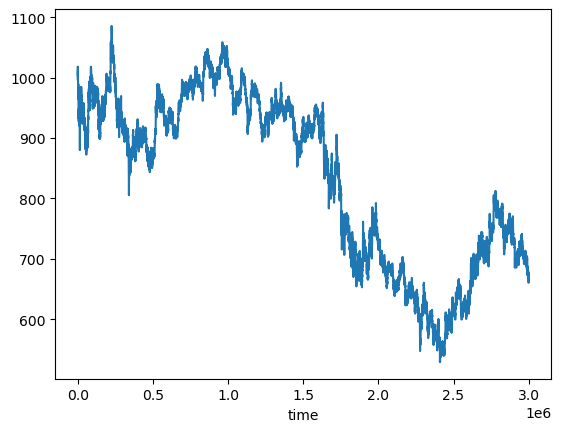

In [44]:
df_all[df_all['product'] == 'VOLCANIC_ROCK_VOUCHER_9500']['mid_price'].plot()

In [10]:
Voucher10500 = df_all[df_all['product'] == 'VOLCANIC_ROCK_VOUCHER_10500']

In [11]:
Rock = df_all[df_all['product'] == 'VOLCANIC_ROCK']

In [21]:
import numpy as np
import pandas as pd
from scipy.stats import norm
from scipy.optimize import brentq

# Black-Scholes call price function.
def black_scholes_call(S, K, T, r, sigma):
    d1 = (np.log(S/K) + (r + 0.5*sigma**2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    return S * norm.cdf(d1) - K * np.exp(-r*T) * norm.cdf(d2)

# Black-Scholes put price function.
def black_scholes_put(S, K, T, r, sigma):
    d1 = (np.log(S/K) + (r + 0.5*sigma**2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    return K * np.exp(-r*T) * norm.cdf(-d2) - S * norm.cdf(-d1)

# Function to compute implied volatility given an option price,
# choosing the proper pricing function based on the option type.
def implied_volatility(option_price, S, K, T, r, option_type, tol=1e-6, sigma_low=1e-6, sigma_high=5.0):
    def error(sigma):
        if option_type == 'call':
            return black_scholes_call(S, K, T, r, sigma) - option_price
        elif option_type == 'put':
            return black_scholes_put(S, K, T, r, sigma) - option_price
        else:
            raise ValueError("option_type must be 'call' or 'put'")
    return brentq(error, sigma_low, sigma_high, xtol=tol)

# Parameters
T = 7 / 365   # time to maturity in years
r = 0.01      # risk-free interest rate

# Extract the underlying asset ("Rock") mid price.
rock = df_all[df_all['product'] == 'VOLCANIC_ROCK']
S = rock['mid_price'].iloc[0]

# Define voucher products with their strike prices and option types.
# (Adjust these entries so that the key names match the ones in your DataFrame.)
voucher_products = {
    'VOLCANIC_ROCK_VOUCHER_9750': {'strike': 9750, 'option_type': 'call'},
    'VOLCANIC_ROCK_VOUCHER_10000': {'strike': 10000, 'option_type': 'call'},
    'VOLCANIC_ROCK_VOUCHER_10250': {'strike': 10250, 'option_type': 'call'},
    'VOLCANIC_ROCK_VOUCHER_10500': {'strike': 10500, 'option_type': 'call'},
    # Add or adjust entries as needed.
}

# List to store the results.
results = []

# Iterate through each voucher product.
for product, details in voucher_products.items():
    K = details['strike']
    option_type = details['option_type']
    voucher = df_all[df_all['product'] == product]
    if voucher.empty:
        # Skip this product if it doesn't exist in the DataFrame.
        continue

    # Extract the observed mid price for the option.
    option_market_price = voucher['mid_price'].iloc[0]
    
    # Calculate implied volatility.
    try:
        sigma_impl = implied_volatility(option_market_price, S, K, T, r, option_type)
    except Exception as e:
        sigma_impl = np.nan
        print(f"Error computing volatility for product {product}: {e}")
    
    # Calculate d1 and then delta, if volatility was determined.
    if np.isnan(sigma_impl):
        delta = np.nan
    else:
        d1 = (np.log(S/K) + (r + 0.5 * sigma_impl**2) * T) / (sigma_impl * np.sqrt(T))
        if option_type == 'call':
            delta = norm.cdf(d1)
        elif option_type == 'put':
            delta = norm.cdf(d1) - 1
    
    # Append the result.
    results.append({
        'product': product,
        'strike': K,
        'option_type': option_type,
        'option_market_price': option_market_price,
        'implied_volatility': sigma_impl,
        'delta': delta
    })

# Convert the results to a DataFrame and print.
results_df = pd.DataFrame(results)
print(results_df)

Error computing volatility for product VOLCANIC_ROCK_VOUCHER_9750: f(a) and f(b) must have different signs
                       product  strike option_type  option_market_price  \
0   VOLCANIC_ROCK_VOUCHER_9750    9750        call                754.5   
1  VOLCANIC_ROCK_VOUCHER_10000   10000        call                505.5   
2  VOLCANIC_ROCK_VOUCHER_10250   10250        call                273.5   
3  VOLCANIC_ROCK_VOUCHER_10500   10500        call                 99.5   

   implied_volatility     delta  
0                 NaN       NaN  
1            0.148551  0.991918  
2            0.169486  0.855146  
3            0.167162  0.512844  


## Voucher delta

In [34]:
df_all['time'] = df_all['timestamp'] + 10000 * 100 * df_all['day']

In [35]:
df_all.set_index('time', inplace=True)
df_all


day  timestamp                      product  bid_price_1  \
time                                                                
0          0          0  VOLCANIC_ROCK_VOUCHER_10500         99.0   
0          0          0                      DJEMBES      13493.0   
0          0          0                   CROISSANTS       4321.0   
0          0          0                         JAMS       6631.0   
0          0          0  VOLCANIC_ROCK_VOUCHER_10000        505.0   
...      ...        ...                          ...          ...   
2999900    2     999900               PICNIC_BASKET2      30073.0   
2999900    2     999900   VOLCANIC_ROCK_VOUCHER_9750        417.0   
2999900    2     999900               PICNIC_BASKET1      58422.0   
2999900    2     999900                   CROISSANTS       4241.0   
2999900    2     999900   VOLCANIC_ROCK_VOUCHER_9500        666.0   

         bid_volume_1  bid_price_2  bid_volume_2  bid_price_3  bid_volume_3  \
time                                                                          
0                19.0          NaN           NaN          NaN           NaN   
0                72.0          NaN           NaN          NaN           NaN   
0               111.0          NaN           NaN          NaN           NaN   
0               210.0          NaN           NaN          NaN           NaN   
0                19.0          NaN           NaN          NaN           NaN   
...               ...          ...           ...          ...           ...   
2999900           1.0      30072.0          39.0          NaN           NaN   
2999900          20.0          NaN           NaN          NaN           NaN   
2999900           1.0      58421.0          39.0          NaN           NaN   
2999900         143.0          NaN           NaN          NaN           NaN   
2999900          20.0          NaN           NaN          NaN           NaN   

         ask_price_1  ask_volume_1  ask_price_2  ask_volume_2  ask_price_3  \
time                                                                         
0                100            19          NaN           NaN          NaN   
0              13494            72          NaN           NaN          NaN   
0               4322           111          NaN           NaN          NaN   
0               6633           210          NaN           NaN          NaN   
0                506            19          NaN           NaN          NaN   
...              ...           ...          ...           ...          ...   
2999900        30078            20      30079.0          20.0          NaN   
2999900          418            20          NaN           NaN          NaN   
2999900        58432            20      58433.0          20.0          NaN   
2999900         4242           143          NaN           NaN          NaN   
2999900          667            20          NaN           NaN          NaN   

         ask_volume_3  mid_price  profit_and_loss  
time                                               
0                 NaN       99.5              0.0  
0                 NaN    13493.5              0.0  
0                 NaN     4321.5              0.0  
0                 NaN     6632.0              0.0  
0                 NaN      505.5              0.0  
...               ...        ...              ...  
2999900           NaN    30075.5              0.0  
2999900           NaN      417.5              0.0  
2999900           NaN    58427.0              0.0  
2999900           NaN     4241.5              0.0  
2999900           NaN      666.5              0.0  

[420000 rows x 17 columns]

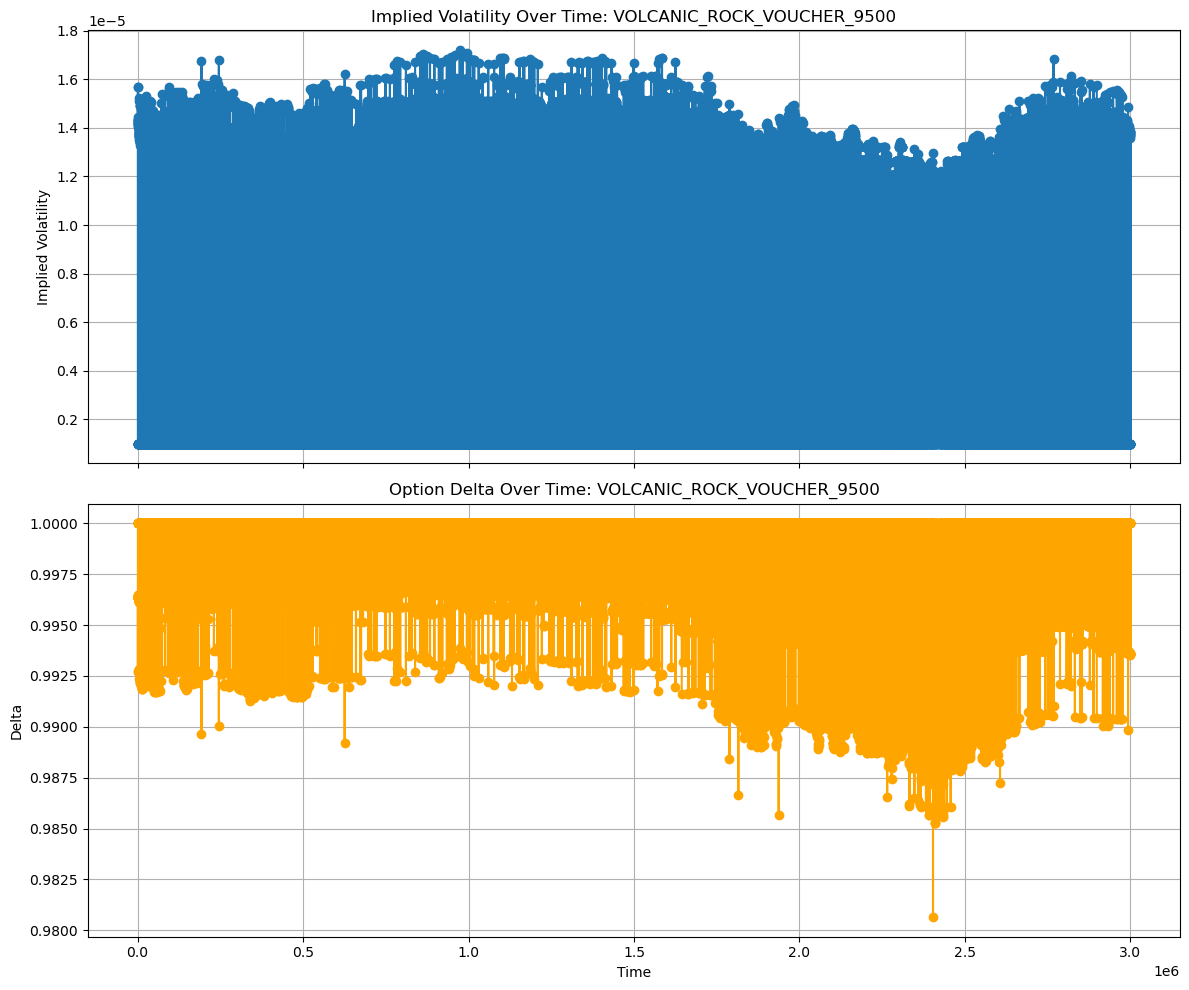

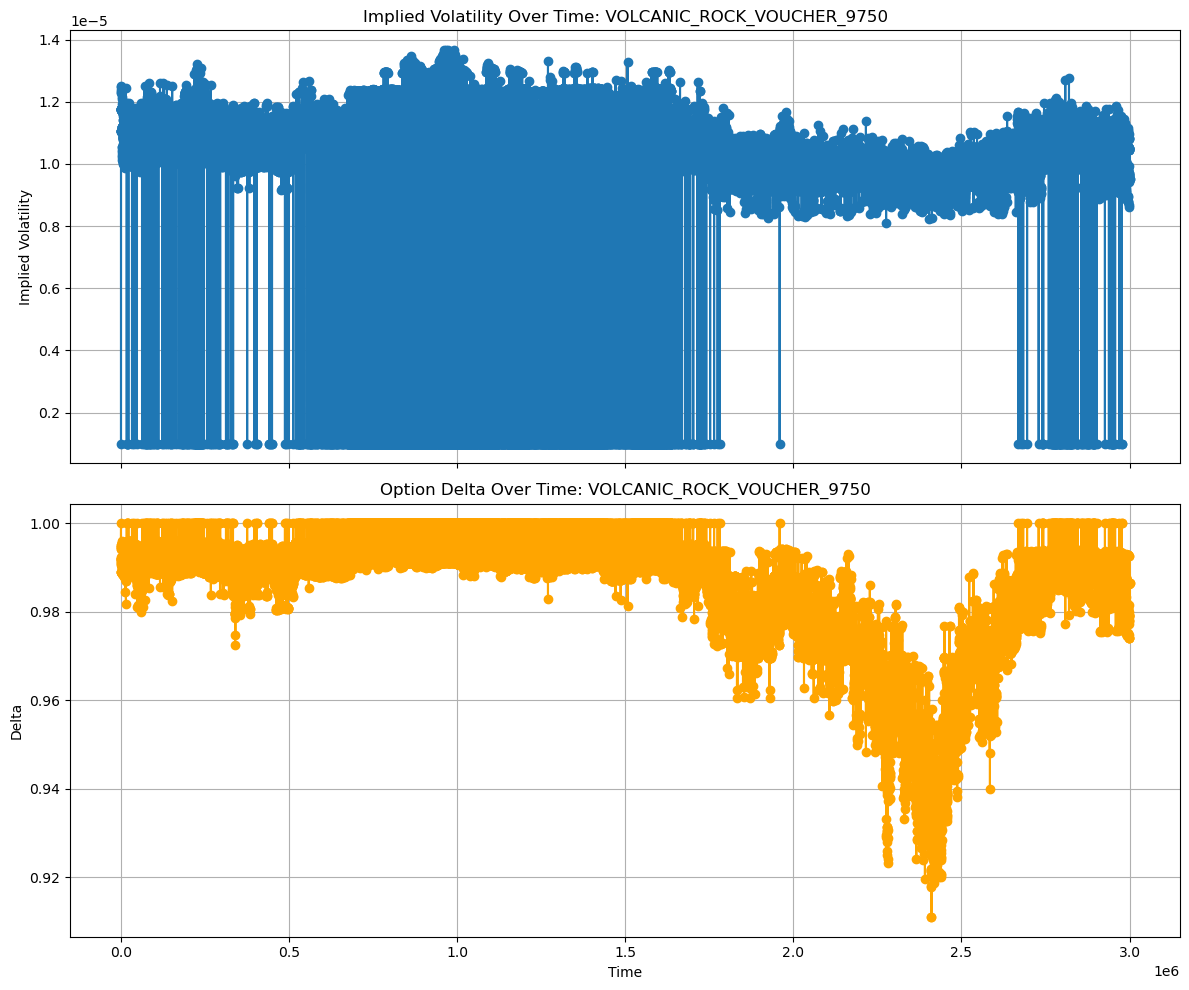

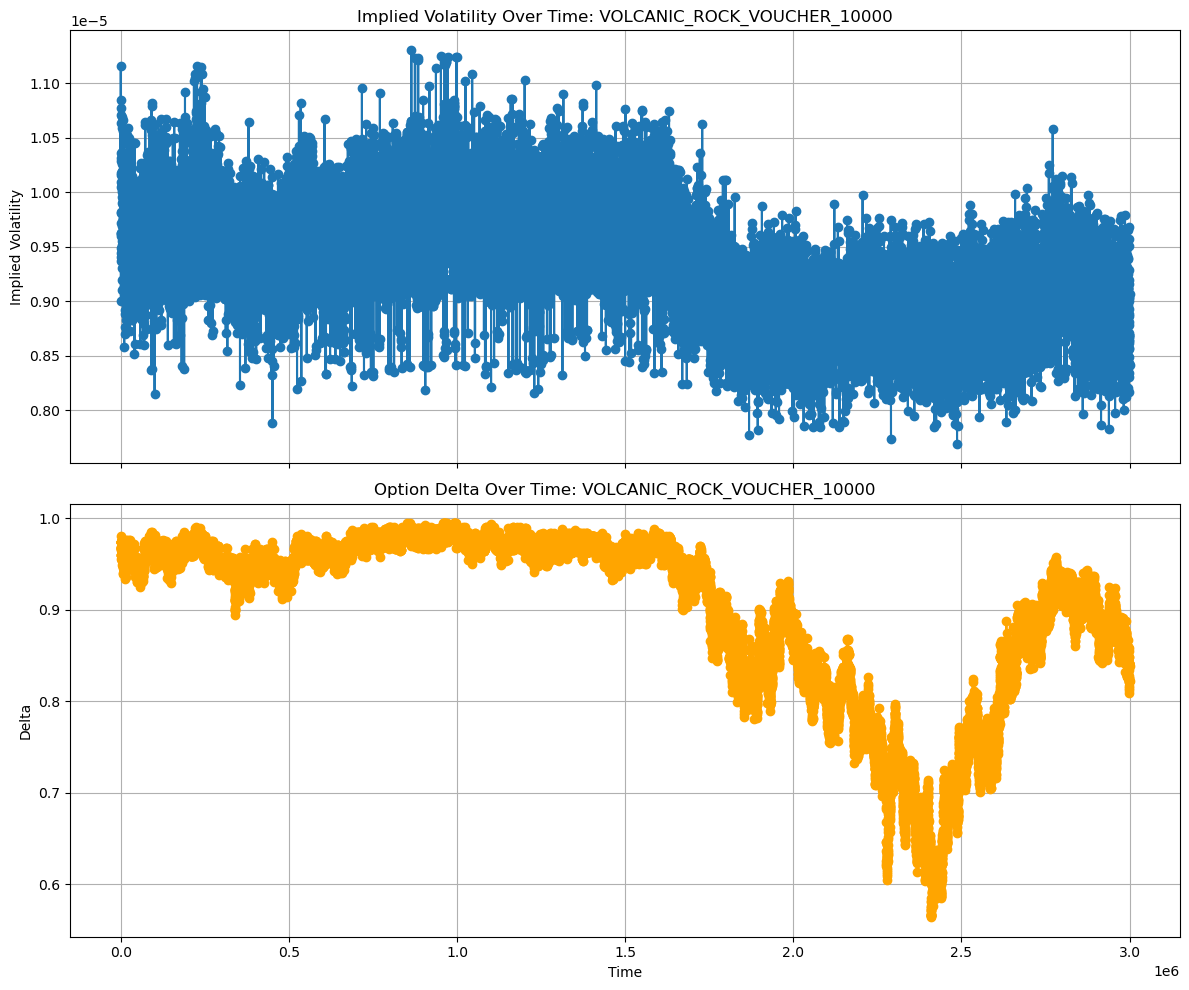

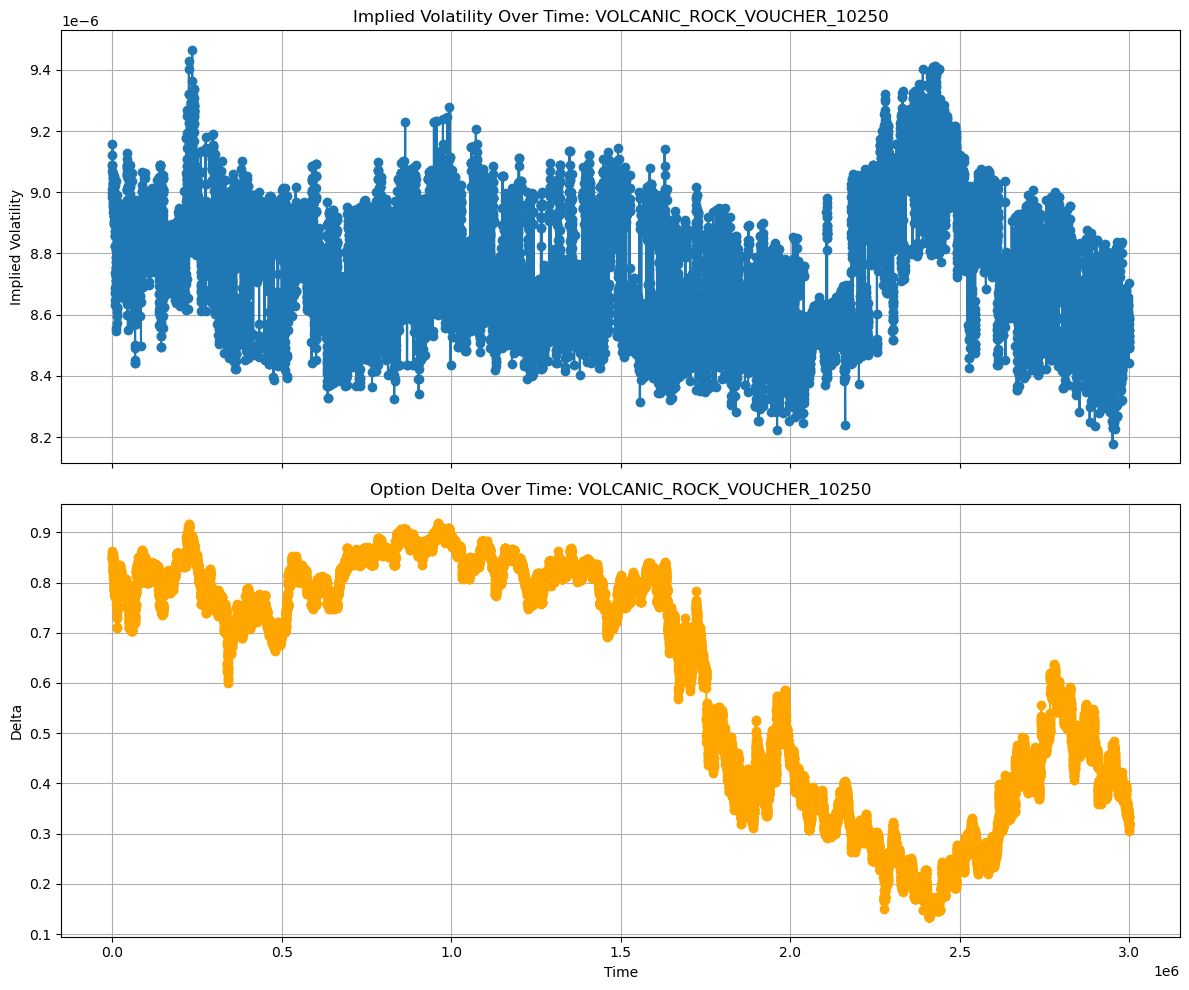

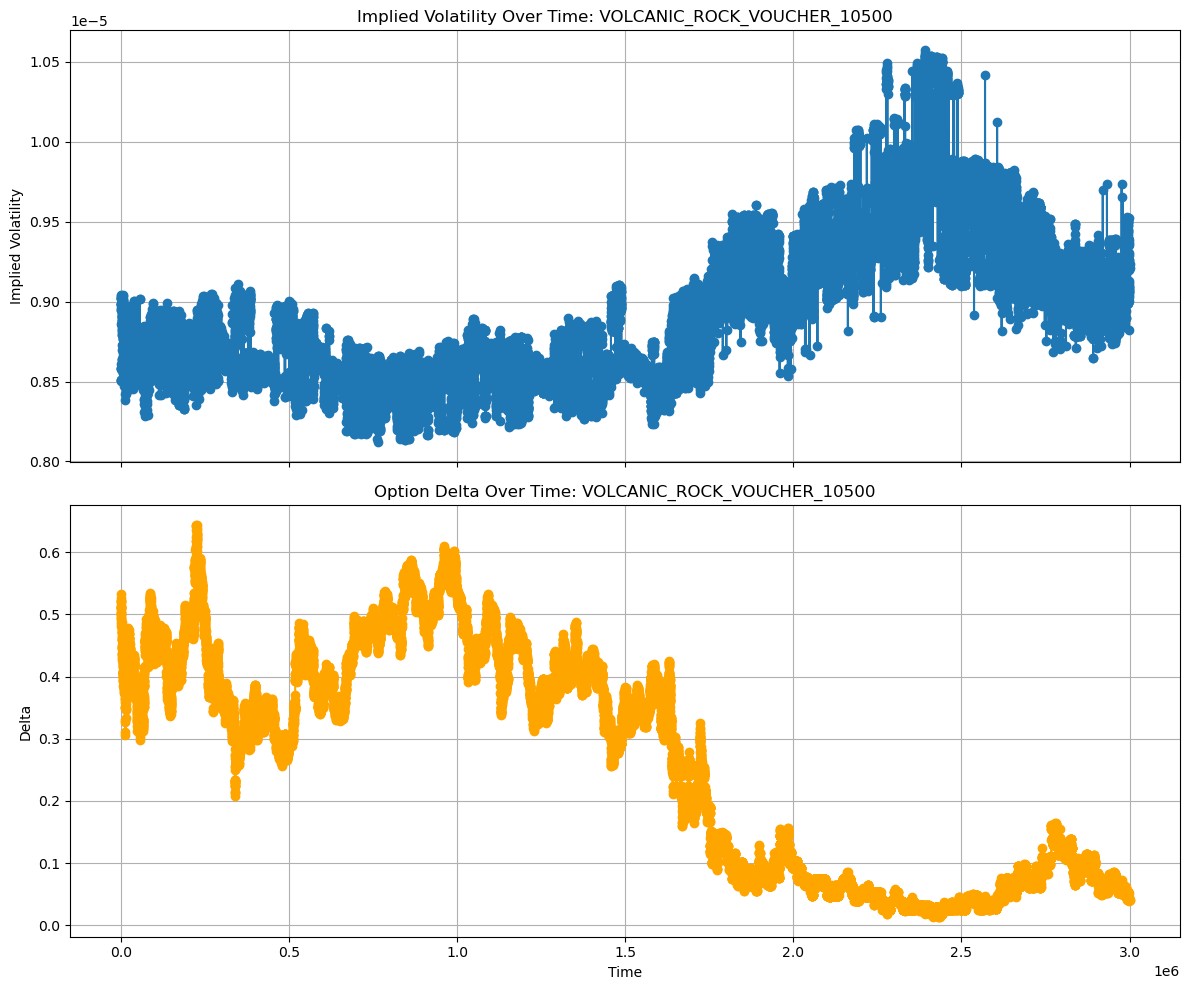

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.optimize import brentq

# Black-Scholes call option pricing function.
def bs_call_price(S, K, T, r, sigma):
    """
    Compute the Black-Scholes price for a European call option.
    
    Parameters:
    - S: underlying price
    - K: strike price
    - T: time to maturity (in years)
    - r: risk-free interest rate (annualized)
    - sigma: volatility (annualized)
    
    Returns:
    - call option price
    """
    if T <= 0:
        # Option has expired.
        return max(S - K, 0)
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)

# Function to calculate implied volatility via numerical inversion.
def implied_vol(S, K, T, r, market_price, tol=1e-6):
    """
    Compute the implied volatility using numerical inversion of the Black-Scholes formula.
    
    Parameters:
    - S: underlying price
    - K: strike price
    - T: time to maturity (in years)
    - r: risk-free interest rate (annualized)
    - market_price: observed market price of the option
    - tol: tolerance for the numerical solver
    
    Returns:
    - implied volatility (sigma) or np.nan if unable to solve.
    """
    def objective(sigma):
        return bs_call_price(S, K, T, r, sigma) - market_price

    try:
        implied_sigma = brentq(objective, 1e-6, 5.0, xtol=tol)
    except ValueError:
        implied_sigma = np.nan
    return implied_sigma

# Function to compute the option delta.
def call_delta(S, K, T, r, sigma):
    """
    Compute the call option delta (using N(d1)) from the Black-Scholes formula.
    
    Parameters:
    - S: underlying price
    - K: strike price
    - T: time to maturity (in years)
    - r: risk-free interest rate (annualized)
    - sigma: volatility (annualized)
    
    Returns:
    - option delta.
    """
    if T <= 0 or sigma == 0:
        return 1.0 if S > K else 0.0
    d1 = (np.log(S/K) + (r + 0.5 * sigma**2)*T) / (sigma*np.sqrt(T))
    return norm.cdf(d1)

# Assumptions / Parameters
# List of voucher products along with their strike prices.
vouchers = [
    ('VOLCANIC_ROCK_VOUCHER_9500', 9500),
    ('VOLCANIC_ROCK_VOUCHER_9750', 9750),
    ('VOLCANIC_ROCK_VOUCHER_10000', 10000),
    ('VOLCANIC_ROCK_VOUCHER_10250', 10250),
    ('VOLCANIC_ROCK_VOUCHER_10500', 10500)
]
r = 0.00   # Annualized risk-free interest rate (adjust if needed)

# Set maturity to 7 days from now.
maturity_date = df_all.index[0] + 10000 * 100 * 7

# Extract underlying prices.
underlying = df_all[df_all['product'] == 'VOLCANIC_ROCK']['mid_price']

# Loop through each voucher and compute IV and delta.
for product, K in vouchers:
    option = df_all[df_all['product'] == product]['mid_price']
    
    # Combine into a single DataFrame and drop rows with missing data.
    data = pd.DataFrame({
        'underlying': underlying,
        'option': option
    }).dropna()
    
    # Compute time to maturity (in years) for each observation.
    data['time_to_maturity'] = (maturity_date - data.index)
    data = data[data['time_to_maturity'] > 0]
    
    # Lists to store computed implied volatility and delta.
    iv_list = []
    delta_list = []
    
    for idx, row in data.iterrows():
        S = row['underlying']
        market_price = row['option']
        T = row['time_to_maturity']
        
        sigma_imp = implied_vol(S, K, T, r, market_price)
        iv_list.append(sigma_imp)
        
        if np.isnan(sigma_imp):
            delta_list.append(np.nan)
        else:
            delta_list.append(call_delta(S, K, T, r, sigma_imp))
    
    data['implied_vol'] = iv_list
    data['delta'] = delta_list
    
    # --- Plotting Results for this voucher ---
    fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

    # Plot Implied Volatility.
    axes[0].plot(data.index, data['implied_vol'], marker='o', linestyle='-')
    axes[0].set_title(f'Implied Volatility Over Time: {product}')
    axes[0].set_ylabel('Implied Volatility')
    axes[0].grid(True)

    # Plot Option Delta.
    axes[1].plot(data.index, data['delta'], marker='o', linestyle='-', color='orange')
    axes[1].set_title(f'Option Delta Over Time: {product}')
    axes[1].set_ylabel('Delta')
    axes[1].set_xlabel('Time')
    axes[1].grid(True)

    plt.tight_layout()
    plt.show()

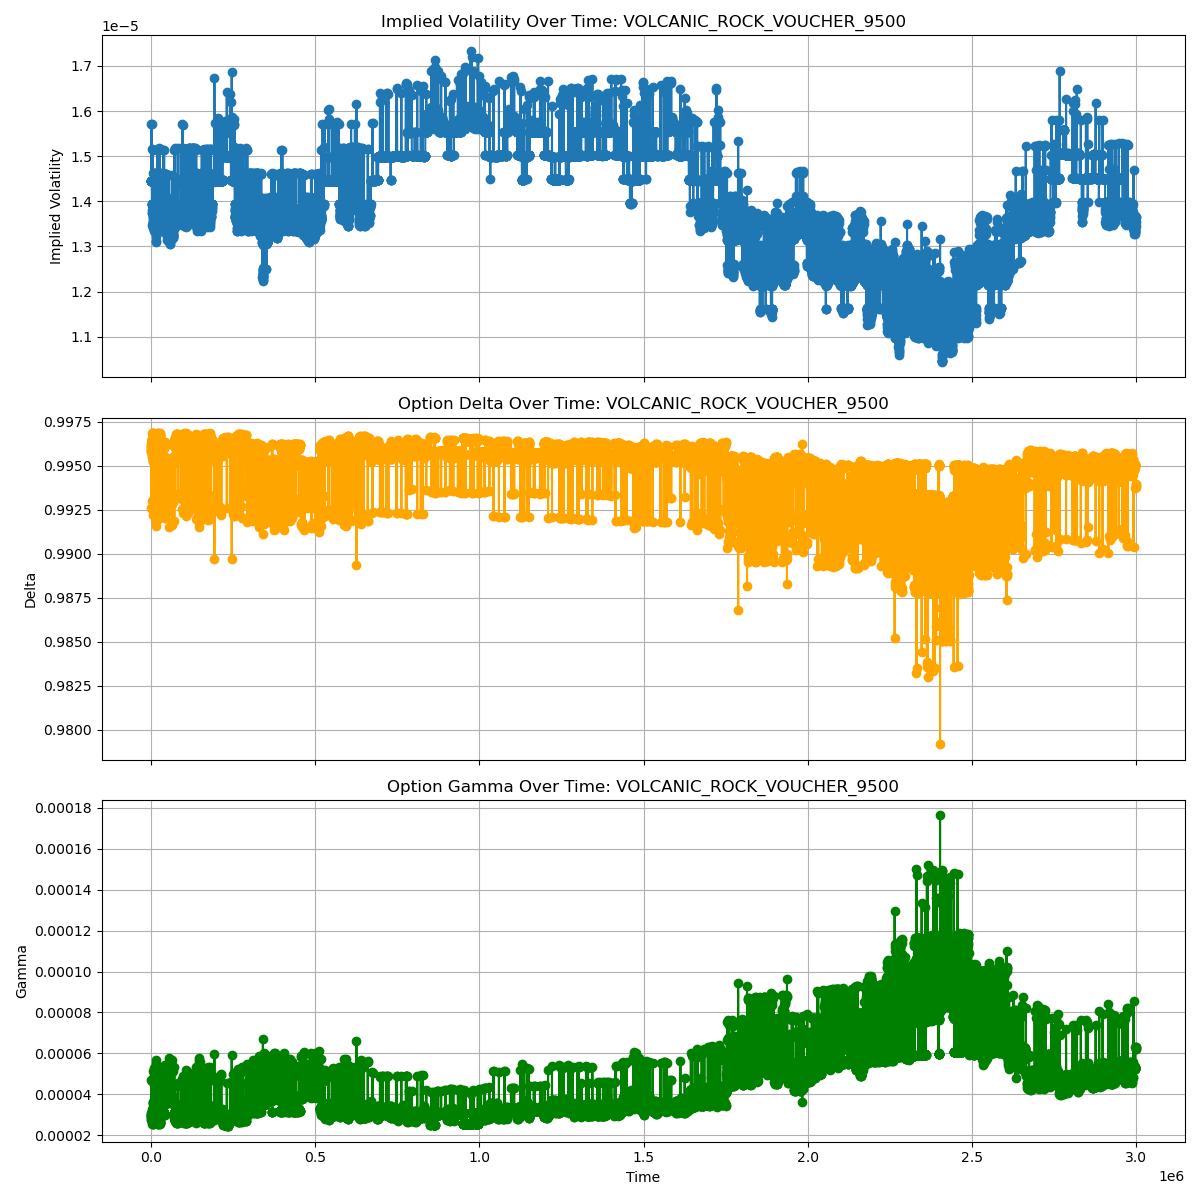

In [150]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.optimize import brentq

# Black-Scholes call option pricing function.
def bs_call_price(S, K, T, r, sigma):
    """
    Compute the Black-Scholes price for a European call option.
    
    Parameters:
    - S: underlying price
    - K: strike price
    - T: time to maturity (in years)
    - r: risk-free interest rate (annualized)
    - sigma: volatility (annualized)
    
    Returns:
    - call option price
    """
    if T <= 0:
        # Option has expired.
        return max(S - K, 0)
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)

# Function to calculate implied volatility via numerical inversion.
def implied_vol(S, K, T, r, market_price, tol=1e-6):
    """
    Compute the implied volatility using numerical inversion of the Black-Scholes formula.
    
    Parameters:
    - S: underlying price
    - K: strike price
    - T: time to maturity (in years)
    - r: risk-free interest rate (annualized)
    - market_price: observed market price of the option
    - tol: tolerance for the numerical solver
    
    Returns:
    - implied volatility (sigma) or np.nan if unable to solve.
    """
    def objective(sigma):
        return bs_call_price(S, K, T, r, sigma) - market_price

    try:
        implied_sigma = brentq(objective, 1e-6, 1e-4, xtol=tol)
    except ValueError:
        implied_sigma = np.nan
    return implied_sigma

# Function to compute the option delta.
def call_delta(S, K, T, r, sigma):
    """
    Compute the call option delta (using N(d1)) from the Black-Scholes formula.
    
    Parameters:
    - S: underlying price
    - K: strike price
    - T: time to maturity (in years)
    - r: risk-free interest rate (annualized)
    - sigma: volatility (annualized)
    
    Returns:
    - option delta.
    """
    if T <= 0 or sigma == 0:
        return 1.0 if S > K else 0.0
    d1 = (np.log(S/K) + (r + 0.5 * sigma**2)*T) / (sigma*np.sqrt(T))
    return norm.cdf(d1)

# --- Added function to compute gamma --- 
def call_gamma(S, K, T, r, sigma):
    """
    Compute the call option gamma from the Black-Scholes formula.
    
    Gamma is given by:
    
      gamma = N'(d1) / (S * sigma * sqrt(T))
    
    where N'(d1) is the standard normal probability density.
    """
    if T <= 0 or sigma == 0:
        return 0.0
    d1 = (np.log(S/K) + (r + 0.5 * sigma**2)*T) / (sigma*np.sqrt(T))
    return norm.pdf(d1) / (S * sigma * np.sqrt(T))
# --- End addition ---

# Assumptions / Parameters
# List of voucher products along with their strike prices.
vouchers = [
    ('VOLCANIC_ROCK_VOUCHER_9500', 9500)
]
r = 0.00   # Annualized risk-free interest rate (adjust if needed)

# Set maturity to 7 days from now.
maturity_date = df_all.index[0] + 10000 * 100 * 7

# Extract underlying prices.
underlying = df_all[df_all['product'] == 'VOLCANIC_ROCK']['mid_price']

# Loop through each voucher and compute IV, delta, and gamma.
for product, K in vouchers:
    option = df_all[df_all['product'] == product]['mid_price']
    
    # Combine into a single DataFrame and drop rows with missing data.
    data = pd.DataFrame({
        'underlying': underlying,
        'option': option
    }).dropna()
    
    # Compute time to maturity (in years) for each observation.
    data['time_to_maturity'] = (maturity_date - data.index)
    data = data[data['time_to_maturity'] > 0]
    
    # Lists to store computed implied volatility, delta, and gamma.
    iv_list = []
    delta_list = []
    gamma_list = []  # --- Added gamma list ---
    
    for idx, row in data.iterrows():
        S = row['underlying']
        market_price = row['option']
        T = row['time_to_maturity']
        
        sigma_imp = implied_vol(S, K, T, r, market_price)
        iv_list.append(sigma_imp)
        
        if np.isnan(sigma_imp):
            delta_list.append(np.nan)
            gamma_list.append(np.nan)  # --- Append nan if sigma is not valid ---
        else:
            delta_list.append(call_delta(S, K, T, r, sigma_imp))
            gamma_list.append(call_gamma(S, K, T, r, sigma_imp))  # --- Compute gamma ---
    
    data['implied_vol'] = iv_list
    data['delta'] = delta_list
    data['gamma'] = gamma_list  # --- Add gamma to the DataFrame ---
    
    # Filter out rows where implied volatility is zero (or nearly zero)
    data = data[data['implied_vol'] > 1e-6]
    
    # --- Plotting Results for this voucher ---
    fig, axes = plt.subplots(3, 1, figsize=(12, 12), sharex=True)

    # Plot Implied Volatility.
    axes[0].plot(data.index, data['implied_vol'], marker='o', linestyle='-')
    axes[0].set_title(f'Implied Volatility Over Time: {product}')
    axes[0].set_ylabel('Implied Volatility')
    axes[0].grid(True)

    # Plot Option Delta.
    axes[1].plot(data.index, data['delta'], marker='o', linestyle='-', color='orange')
    axes[1].set_title(f'Option Delta Over Time: {product}')
    axes[1].set_ylabel('Delta')
    axes[1].grid(True)

    # --- Added Gamma plot ---
    axes[2].plot(data.index, data['gamma'], marker='o', linestyle='-', color='green')
    axes[2].set_title(f'Option Gamma Over Time: {product}')
    axes[2].set_ylabel('Gamma')
    axes[2].set_xlabel('Time')
    axes[2].grid(True)

    plt.tight_layout()
    plt.show()

In [154]:
df_all

day  timestamp                      product  bid_price_1  \
time                                                                
0          0          0  VOLCANIC_ROCK_VOUCHER_10500         99.0   
0          0          0                      DJEMBES      13493.0   
0          0          0                   CROISSANTS       4321.0   
0          0          0                         JAMS       6631.0   
0          0          0  VOLCANIC_ROCK_VOUCHER_10000        505.0   
...      ...        ...                          ...          ...   
2999900    2     999900               PICNIC_BASKET2      30073.0   
2999900    2     999900   VOLCANIC_ROCK_VOUCHER_9750        417.0   
2999900    2     999900               PICNIC_BASKET1      58422.0   
2999900    2     999900                   CROISSANTS       4241.0   
2999900    2     999900   VOLCANIC_ROCK_VOUCHER_9500        666.0   

         bid_volume_1  bid_price_2  bid_volume_2  bid_price_3  bid_volume_3  \
time                                                                          
0                19.0          NaN           NaN          NaN           NaN   
0                72.0          NaN           NaN          NaN           NaN   
0               111.0          NaN           NaN          NaN           NaN   
0               210.0          NaN           NaN          NaN           NaN   
0                19.0          NaN           NaN          NaN           NaN   
...               ...          ...           ...          ...           ...   
2999900           1.0      30072.0          39.0          NaN           NaN   
2999900          20.0          NaN           NaN          NaN           NaN   
2999900           1.0      58421.0          39.0          NaN           NaN   
2999900         143.0          NaN           NaN          NaN           NaN   
2999900          20.0          NaN           NaN          NaN           NaN   

         ask_price_1  ask_volume_1  ask_price_2  ask_volume_2  ask_price_3  \
time                                                                         
0                100            19          NaN           NaN          NaN   
0              13494            72          NaN           NaN          NaN   
0               4322           111          NaN           NaN          NaN   
0               6633           210          NaN           NaN          NaN   
0                506            19          NaN           NaN          NaN   
...              ...           ...          ...           ...          ...   
2999900        30078            20      30079.0          20.0          NaN   
2999900          418            20          NaN           NaN          NaN   
2999900        58432            20      58433.0          20.0          NaN   
2999900         4242           143          NaN           NaN          NaN   
2999900          667            20          NaN           NaN          NaN   

         ask_volume_3  mid_price  profit_and_loss  
time                                               
0                 NaN       99.5              0.0  
0                 NaN    13493.5              0.0  
0                 NaN     4321.5              0.0  
0                 NaN     6632.0              0.0  
0                 NaN      505.5              0.0  
...               ...        ...              ...  
2999900           NaN    30075.5              0.0  
2999900           NaN      417.5              0.0  
2999900           NaN    58427.0              0.0  
2999900           NaN     4241.5              0.0  
2999900           NaN      666.5              0.0  

[420000 rows x 17 columns]

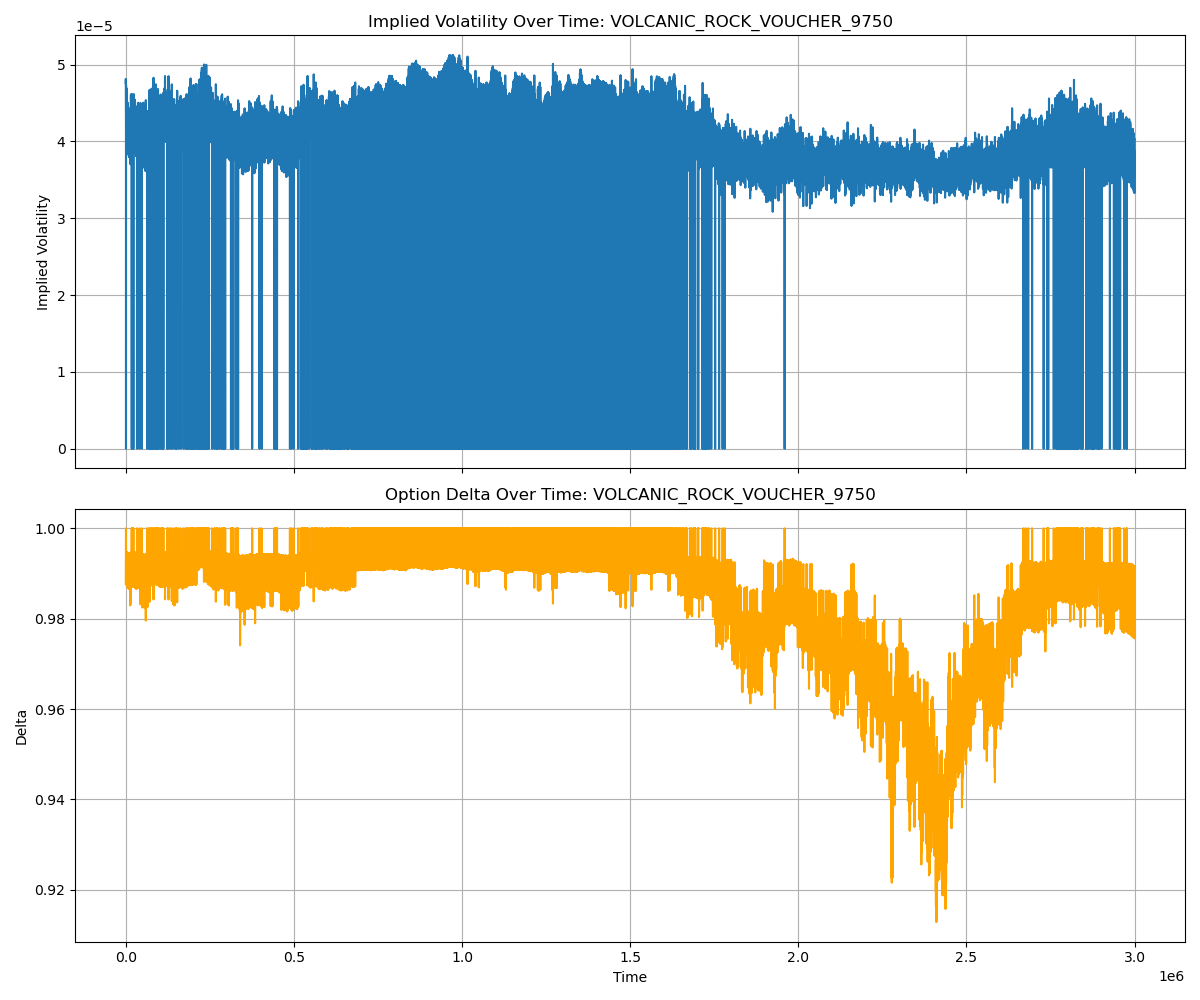

In [156]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.optimize import brentq

# Black-Scholes call option pricing function.
def bs_call_price(S, K, T, r, sigma):
    """
    Compute the Black-Scholes price for a European call option.
    
    Parameters:
    - S: underlying price
    - K: strike price
    - T: time to maturity (in years)
    - r: risk-free interest rate (annualized)
    - sigma: volatility (annualized)
    
    Returns:
    - call option price
    """
    if T <= 0:
        # Option has expired.
        return max(S - K, 0)
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)

# Function to calculate implied volatility via numerical inversion.
def implied_vol(S, K, T, r, market_price, tol=1e-8):
    """
    Compute the implied volatility using numerical inversion of the Black-Scholes formula.
    
    Parameters:
    - S: underlying price
    - K: strike price
    - T: time to maturity (in years)
    - r: risk-free interest rate (annualized)
    - market_price: observed market price of the option
    - tol: tolerance for the numerical solver
    
    Returns:
    - implied volatility (sigma) or np.nan if unable to solve.
    """
    def objective(sigma):
        return bs_call_price(S, K, T, r, sigma) - market_price

    try:
        implied_sigma = brentq(objective, 1e-8, 1e-4, xtol=tol)
    except ValueError:
        implied_sigma = np.nan
    return implied_sigma

# Function to compute the option delta.
def call_delta(S, K, T, r, sigma):
    """
    Compute the call option delta (using N(d1)) from the Black-Scholes formula.
    
    Parameters:
    - S: underlying price
    - K: strike price
    - T: time to maturity (in years)
    - r: risk-free interest rate (annualized)
    - sigma: volatility (annualized)
    
    Returns:
    - option delta.
    """
    if T <= 0 or sigma == 0:
        return 1.0 if S > K else 0.0
    d1 = (np.log(S/K) + (r + 0.5 * sigma**2)*T) / (sigma*np.sqrt(T))
    return norm.cdf(d1)

# Assumptions / Parameters
# List of voucher products along with their strike prices.
vouchers = [
    ('VOLCANIC_ROCK_VOUCHER_9750', 9750)
]
r = 0.00   # Annualized risk-free interest rate (adjust if needed)

# Set maturity to 7 days from now.
maturity_date = df_all.index[0] + 10000 * 100 * 7

# Extract underlying prices.
underlying = df_all[df_all['product'] == 'VOLCANIC_ROCK']['mid_price']

# Loop through each voucher and compute IV and delta.
for product, K in vouchers:
    option = df_all[df_all['product'] == product]['mid_price']
    
    # Combine into a single DataFrame and drop rows with missing data.
    data = pd.DataFrame({
        'underlying': underlying,
        'option': option
    }).dropna()
    
    # Compute time to maturity (in years) for each observation.
    data['time_to_maturity'] = (maturity_date - data.index)/ 10000 * 100 * 7
    data = data[data['time_to_maturity'] > 0]
    
    # Lists to store computed implied volatility and delta.
    iv_list = []
    delta_list = []
    
    for idx, row in data.iterrows():
        S = row['underlying']
        market_price = row['option']
        T = row['time_to_maturity']
        
        sigma_imp = implied_vol(S, K, T, r, market_price)
        iv_list.append(sigma_imp)
        
        if np.isnan(sigma_imp):
            delta_list.append(np.nan)
        else:
            delta_list.append(call_delta(S, K, T, r, sigma_imp))
    
    data['implied_vol'] = iv_list
    data['delta'] = delta_list
    
    # Filter out rows where implied volatility is zero (or nearly zero)
    #data = data[data['implied_vol'] > 1e-6]
    
    # --- Plotting Results for this voucher ---
    fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

    # Plot Implied Volatility.
    axes[0].plot(data.index, data['implied_vol'],  linestyle='-')
    axes[0].set_title(f'Implied Volatility Over Time: {product}')
    axes[0].set_ylabel('Implied Volatility')
    axes[0].grid(True)

    # Plot Option Delta.
    axes[1].plot(data.index, data['delta'],  linestyle='-', color='orange')
    axes[1].set_title(f'Option Delta Over Time: {product}')
    axes[1].set_ylabel('Delta')
    axes[1].set_xlabel('Time')
    axes[1].grid(True)

    plt.tight_layout()
    plt.show()

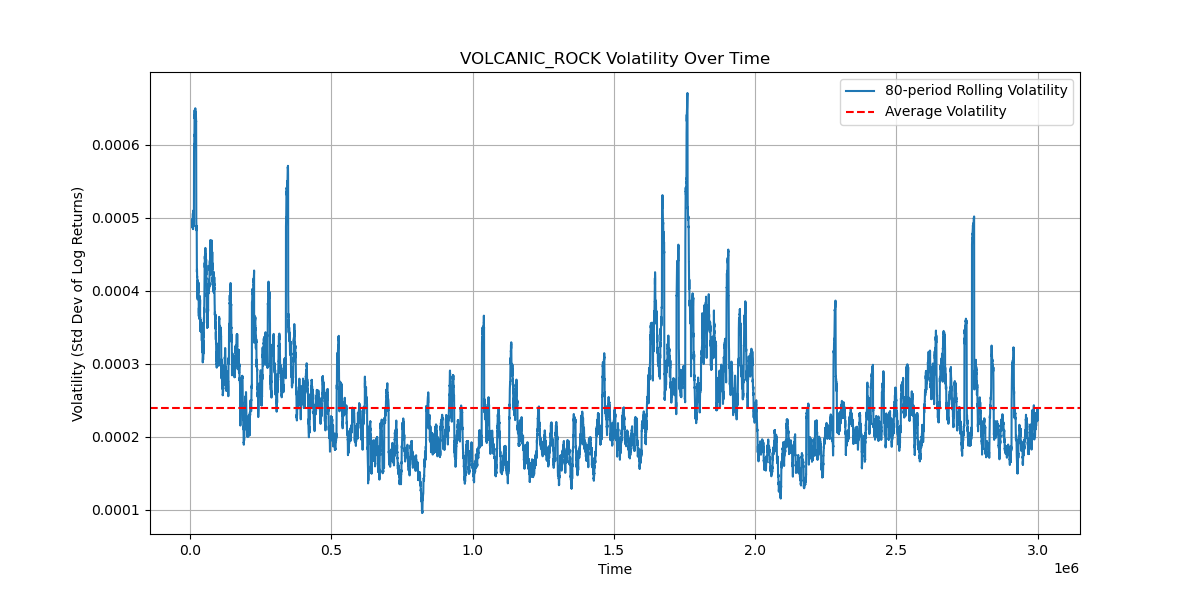

In [134]:
import numpy as np
import matplotlib.pyplot as plt

# Filter the DataFrame for the 'VOLCANIC_ROCK' product.
volcanic_rock = df_all[df_all['product'] == 'VOLCANIC_ROCK'].copy()

# Ensure the DataFrame index is a datetime if it's not already.
# Uncomment the next line if necessary:
# volcanic_rock.index = pd.to_datetime(volcanic_rock.index)

# Calculate the log returns of the mid_price.
volcanic_rock['log_return'] = np.log(volcanic_rock['mid_price']).diff()

# Define the rolling window size, for example, 60 periods.
window_size = 80

# Calculate the rolling standard deviation of the log returns as a measure of volatility.
volcanic_rock['volatility'] = volcanic_rock['log_return'].rolling(window=window_size).std()

# Calculate the overall average volatility from the rolling volatility.
average_volatility = volcanic_rock['volatility'].mean()

# Create the plot for volatility.
plt.figure(figsize=(12, 6))
plt.plot(volcanic_rock.index, volcanic_rock['volatility'], linestyle='-', label=f'{window_size}-period Rolling Volatility')

# Plot the average volatility line.
plt.axhline(average_volatility, color='red', linestyle='--', label='Average Volatility')

plt.title('VOLCANIC_ROCK Volatility Over Time')
plt.xlabel('Time')
plt.ylabel('Volatility (Std Dev of Log Returns)')
plt.legend()
plt.grid(True)
plt.show()

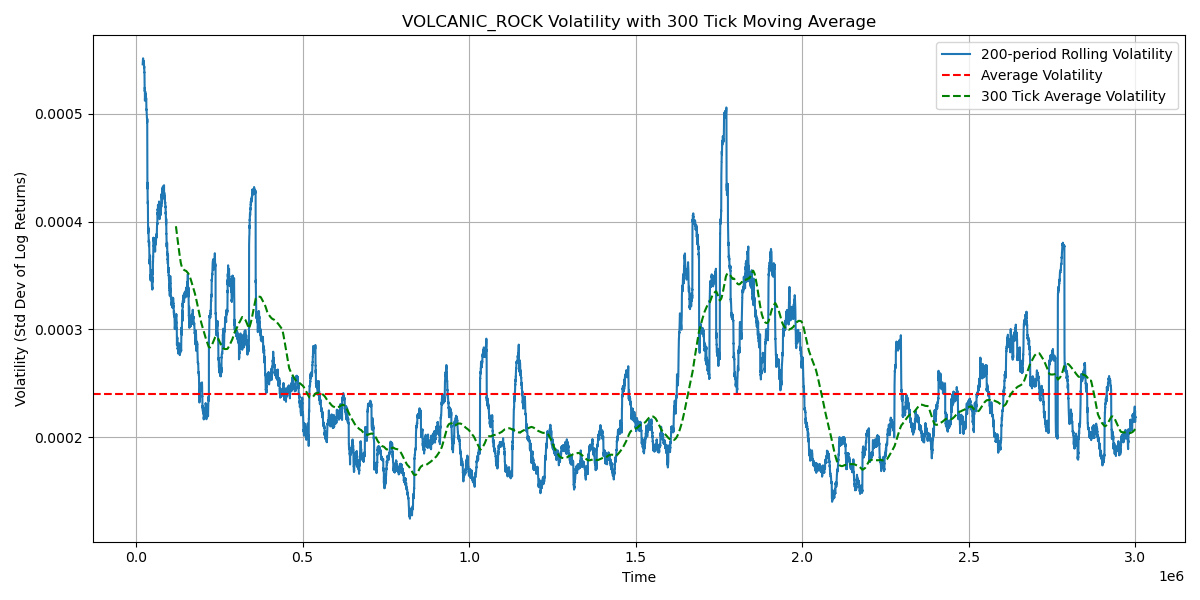

In [135]:
import numpy as np
import matplotlib.pyplot as plt

# Filter the DataFrame for the 'VOLCANIC_ROCK' product.
volcanic_rock = df_all[df_all['product'] == 'VOLCANIC_ROCK'].copy()

# Ensure the DataFrame index is a datetime if it's not already.
# Uncomment the next line if necessary:
# volcanic_rock.index = pd.to_datetime(volcanic_rock.index)

# Calculate the log returns of the mid_price.
volcanic_rock['log_return'] = np.log(volcanic_rock['mid_price']).diff()

# Define the rolling window size for volatility calculation, e.g., 60 periods.
window_size = 200

# Calculate the rolling standard deviation of the log returns as a measure of volatility.
volcanic_rock['volatility'] = volcanic_rock['log_return'].rolling(window=window_size).std()

# Calculate the overall average volatility from the rolling volatility.
average_volatility = volcanic_rock['volatility'].mean()

# Calculate the 300 tick moving average of the volatility.
volcanic_rock['300_tick_avg_vol'] = volcanic_rock['volatility'].rolling(window=1000).mean()

# Create the plot.
plt.figure(figsize=(12, 6))

# Plot the calculated volatility.
plt.plot(volcanic_rock.index, volcanic_rock['volatility'], linestyle='-', label=f'{window_size}-period Rolling Volatility')

# Plot the overall average volatility as a horizontal line.
plt.axhline(average_volatility, color='red', linestyle='--', label='Average Volatility')

# Plot the 300 tick moving average of the volatility.
plt.plot(volcanic_rock.index, volcanic_rock['300_tick_avg_vol'], color='green', linestyle='--', label='300 Tick Average Volatility')

plt.title('VOLCANIC_ROCK Volatility with 300 Tick Moving Average')
plt.xlabel('Time')
plt.ylabel('Volatility (Std Dev of Log Returns)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

/var/folders/n2/thbk5_b11zl19rfgnpxvmsvh0000gn/T/ipykernel_24565/757091081.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv(filename, index_col=0, parse_dates=True)
/var/folders/n2/thbk5_b11zl19rfgnpxvmsvh0000gn/T/ipykernel_24565/757091081.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv(filename, index_col=0, parse_dates=True)
/var/folders/n2/thbk5_b11zl19rfgnpxvmsvh0000gn/T/ipykernel_24565/757091081.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv(filename, index_col=0, parse_dates=True)


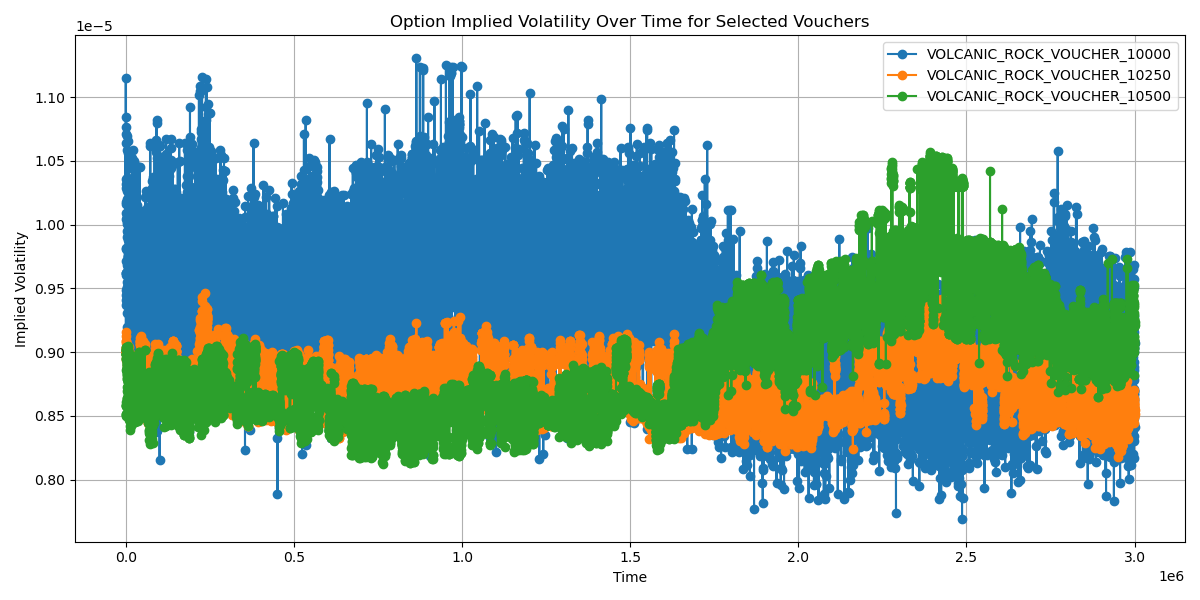

In [112]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the products with strike prices of interest.
selected_products = [
    'VOLCANIC_ROCK_VOUCHER_10000',
    'VOLCANIC_ROCK_VOUCHER_10250',
    'VOLCANIC_ROCK_VOUCHER_10500'
]

fig, ax = plt.subplots(figsize=(12, 6))

# Loop over selected products, load the CSV file, and plot the implied volatility values.
for product in selected_products:
    filename = f"{product}_iv_delta_record.csv"
    data = pd.read_csv(filename, index_col=0, parse_dates=True)
    
    # Optionally remove rows with zero implied_vol values.
    data = data[data['implied_vol'] != 0]
    
    ax.plot(data.index, data['implied_vol'], marker='o', linestyle='-', label=product)

ax.set_title('Option Implied Volatility Over Time for Selected Vouchers')
ax.set_ylabel('Implied Volatility')
ax.set_xlabel('Time')
ax.grid(True)
ax.legend()
plt.tight_layout()
plt.show()

In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.optimize import brentq

# Black-Scholes call option pricing function.
def bs_call_price(S, K, T, r, sigma):
    """
    Compute the Black-Scholes price for a European call option.
    
    Parameters:
    - S: underlying price
    - K: strike price
    - T: time to maturity (in years)
    - r: risk-free interest rate (annualized)
    - sigma: volatility (annualized)
    
    Returns:
    - call option price
    """
    if T <= 0:
        # Option has expired.
        return max(S - K, 0)
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)

# Function to calculate implied volatility via numerical inversion.
def implied_vol(S, K, T, r, market_price, tol=1e-6):
    """
    Compute the implied volatility using numerical inversion of the Black-Scholes formula.
    
    Parameters:
    - S: underlying price
    - K: strike price
    - T: time to maturity (in years)
    - r: risk-free interest rate (annualized)
    - market_price: observed market price of the option
    - tol: tolerance for the numerical solver
    
    Returns:
    - implied volatility (sigma) or np.nan if unable to solve.
    """
    def objective(sigma):
        return bs_call_price(S, K, T, r, sigma) - market_price

    try:
        implied_sigma = brentq(objective, 1e-6, 5.0, xtol=tol)
    except ValueError:
        implied_sigma = np.nan
    return implied_sigma

# Function to compute the option delta.
def call_delta(S, K, T, r, sigma):
    """
    Compute the call option delta (using N(d1)) from the Black-Scholes formula.
    
    Parameters:
    - S: underlying price
    - K: strike price
    - T: time to maturity (in years)
    - r: risk-free interest rate (annualized)
    - sigma: volatility (annualized)
    
    Returns:
    - option delta.
    """
    if T <= 0 or sigma == 0:
        return 1.0 if S > K else 0.0
    d1 = (np.log(S/K) + (r + 0.5 * sigma**2)*T) / (sigma*np.sqrt(T))
    return norm.cdf(d1)

# Assumptions / Parameters
# List of voucher products along with their strike prices.
vouchers = [
    ('VOLCANIC_ROCK_VOUCHER_9500', 9500),
    ('VOLCANIC_ROCK_VOUCHER_9750', 9750),
    ('VOLCANIC_ROCK_VOUCHER_10000', 10000),
    ('VOLCANIC_ROCK_VOUCHER_10250', 10250),
    ('VOLCANIC_ROCK_VOUCHER_10500', 10500)
]
r = 0.00   # Annualized risk-free interest rate (adjust if needed)

# Set maturity to 7 days from now.
maturity_date = df_all.index[0] + 10000 * 100 * 7

# Extract underlying prices.
underlying = df_all[df_all['product'] == 'VOLCANIC_ROCK']['mid_price']

# Define threshold for delta plot filtering (adjust as needed).
threshold = 0.1

# Loop through each voucher and compute IV and delta.
for product, K in vouchers:
    option = df_all[df_all['product'] == product]['mid_price']
    
    # Combine into a single DataFrame and drop rows with missing data.
    data = pd.DataFrame({
        'underlying': underlying,
        'option': option
    }).dropna()
    
    # Compute time to maturity (in years) for each observation.
    data['time_to_maturity'] = (maturity_date - data.index)
    data = data[data['time_to_maturity'] > 0]
    
    # Lists to store computed implied volatility and delta.
    iv_list = []
    delta_list = []
    
    for idx, row in data.iterrows():
        S = row['underlying']
        market_price = row['option']
        T = row['time_to_maturity']
        
        sigma_imp = implied_vol(S, K, T, r, market_price)
        iv_list.append(sigma_imp)
        
        if np.isnan(sigma_imp):
            delta_list.append(np.nan)
        else:
            delta_list.append(call_delta(S, K, T, r, sigma_imp))
    
    data['implied_vol'] = iv_list
    data['delta'] = delta_list

    # --- Record Values ---
    # Save computed implied volatility and delta values to a CSV file.
    data.to_csv(f"{product}_iv_delta_record.csv")
    
    # --- Prepare data for plotting: filter out zero values ---
    plot_data_iv = data[data['implied_vol'] != 0]
    plot_data_delta = data[(data['delta'] != 0) & 
                           (data['delta'] > (0.5 - threshold)) & 
                           (data['delta'] < (0.5 + threshold))]
    
    # --- Plotting Results for this voucher ---
    fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

    # Plot Implied Volatility.
    axes[0].plot(plot_data_iv.index, plot_data_iv['implied_vol'], marker='o', linestyle='-')
    axes[0].set_title(f'Implied Volatility Over Time: {product}')
    axes[0].set_ylabel('Implied Volatility')
    axes[0].grid(True)

    # Plot Option Delta.
    axes[1].plot(plot_data_delta.index, plot_data_delta['delta'], marker='o', linestyle='-', color='orange')
    axes[1].set_title(f'Option Delta Over Time: {product}')
    axes[1].set_ylabel('Delta')
    axes[1].set_xlabel('Time')
    axes[1].grid(True)

    plt.tight_layout()
    plt.show()

KeyboardInterrupt: 

## Choosing a threshold 

/var/folders/n2/thbk5_b11zl19rfgnpxvmsvh0000gn/T/ipykernel_24565/1292933980.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv(filename, index_col=0, parse_dates=True)
/var/folders/n2/thbk5_b11zl19rfgnpxvmsvh0000gn/T/ipykernel_24565/1292933980.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv(filename, index_col=0, parse_dates=True)
/var/folders/n2/thbk5_b11zl19rfgnpxvmsvh0000gn/T/ipykernel_24565/1292933980.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv(filename, index_col=0, parse_dates=True)


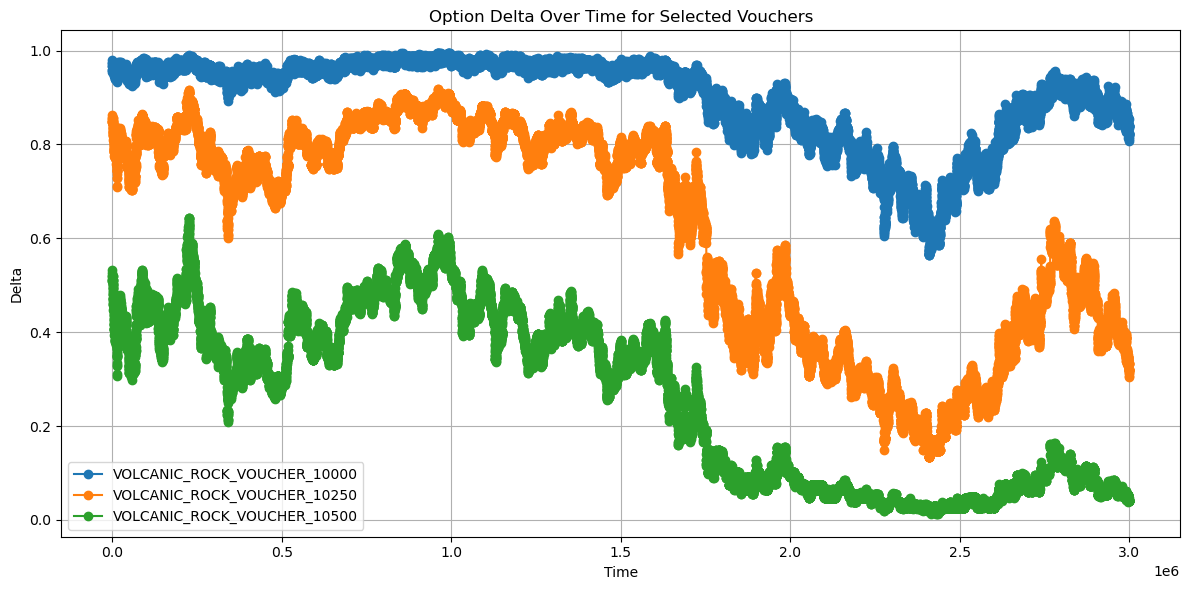

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the products with strike prices of interest.
selected_products = [
    'VOLCANIC_ROCK_VOUCHER_10000',
    'VOLCANIC_ROCK_VOUCHER_10250',
    'VOLCANIC_ROCK_VOUCHER_10500'
]

fig, ax = plt.subplots(figsize=(12, 6))

# Loop over selected products, load the CSV file, and plot the delta values.
for product in selected_products:
    filename = f"{product}_iv_delta_record.csv"
    data = pd.read_csv(filename, index_col=0, parse_dates=True)
    
    # Optionally remove rows with zero delta values.
    data = data[data['delta'] != 0]
    
    ax.plot(data.index, data['delta'], marker='o', linestyle='-', label=product)

ax.set_title('Option Delta Over Time for Selected Vouchers')
ax.set_ylabel('Delta')
ax.set_xlabel('Time')
ax.grid(True)
ax.legend()
plt.tight_layout()
plt.show()

/var/folders/n2/thbk5_b11zl19rfgnpxvmsvh0000gn/T/ipykernel_24565/1835701211.py:30: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv(filename, index_col=0, parse_dates=True)
/var/folders/n2/thbk5_b11zl19rfgnpxvmsvh0000gn/T/ipykernel_24565/1835701211.py:30: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv(filename, index_col=0, parse_dates=True)
/var/folders/n2/thbk5_b11zl19rfgnpxvmsvh0000gn/T/ipykernel_24565/1835701211.py:30: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv(filename, index_col=0, parse_dates=True)


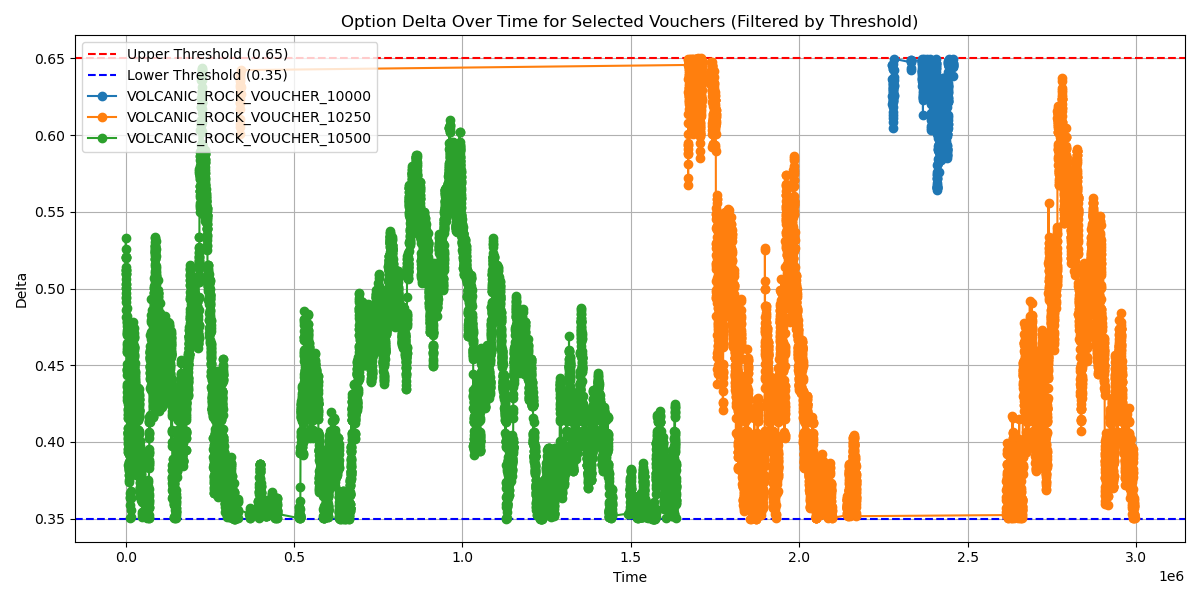

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the products with strike prices of interest.
selected_products = [
    'VOLCANIC_ROCK_VOUCHER_10000',
    'VOLCANIC_ROCK_VOUCHER_10250',
    'VOLCANIC_ROCK_VOUCHER_10500'
]

# Define the delta thresholds.
thresholdup = 0.15  # upper threshold adjustment
thresholddown = 0.15  # lower threshold adjustment

fig, ax = plt.subplots(figsize=(12, 6))

# Determine threshold boundary values.
upper_threshold = 0.5 + thresholdup
lower_threshold = 0.5 - thresholddown

# Plot horizontal lines for the threshold boundaries.
ax.axhline(upper_threshold, color='red', linestyle='--', 
           label=f'Upper Threshold ({upper_threshold:.2f})')
ax.axhline(lower_threshold, color='blue', linestyle='--', 
           label=f'Lower Threshold ({lower_threshold:.2f})')

# Loop over selected products, load the CSV file, and plot filtered delta values.
for product in selected_products:
    filename = f"{product}_iv_delta_record.csv"
    data = pd.read_csv(filename, index_col=0, parse_dates=True)
    
    # Filter the delta column to only include values within the specified threshold range.
    data = data[(data['delta'] > lower_threshold) & (data['delta'] < upper_threshold)]
    
    ax.plot(data.index, data['delta'], marker='o', linestyle='-', label=product)

ax.set_title('Option Delta Over Time for Selected Vouchers (Filtered by Threshold)')
ax.set_ylabel('Delta')
ax.set_xlabel('Time')
ax.grid(True)
ax.legend()
plt.tight_layout()
plt.show()

/var/folders/n2/thbk5_b11zl19rfgnpxvmsvh0000gn/T/ipykernel_24565/1835701211.py:30: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv(filename, index_col=0, parse_dates=True)
/var/folders/n2/thbk5_b11zl19rfgnpxvmsvh0000gn/T/ipykernel_24565/1835701211.py:30: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv(filename, index_col=0, parse_dates=True)
/var/folders/n2/thbk5_b11zl19rfgnpxvmsvh0000gn/T/ipykernel_24565/1835701211.py:30: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv(filename, index_col=0, parse_dates=True)


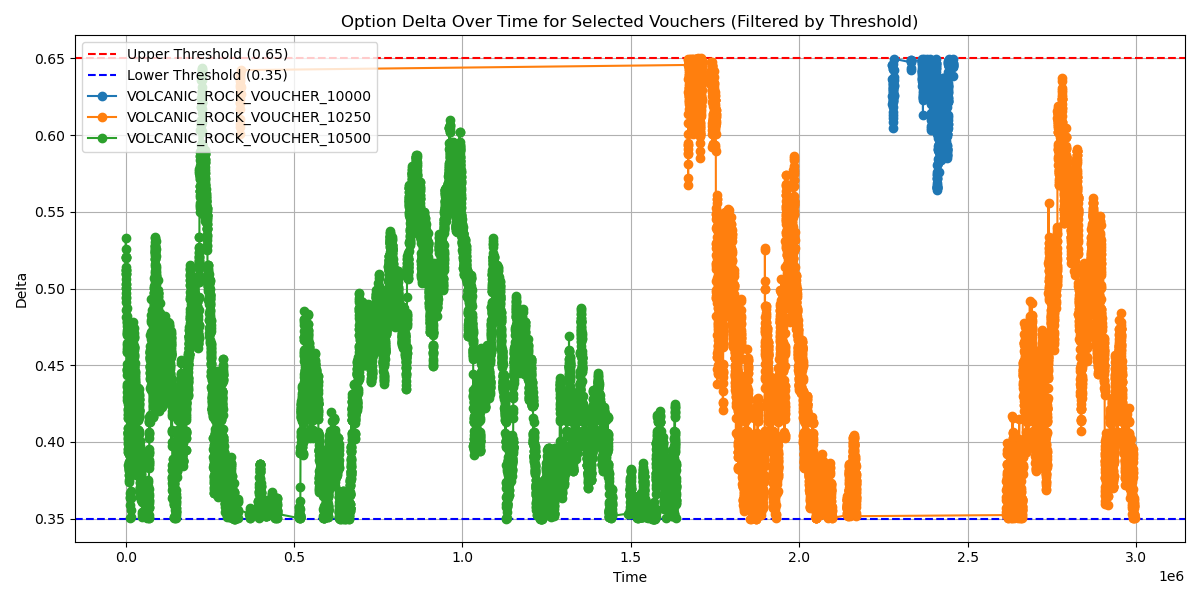

In [91]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the products with strike prices of interest.
selected_products = [
    'VOLCANIC_ROCK_VOUCHER_10000',
    'VOLCANIC_ROCK_VOUCHER_10250',
    'VOLCANIC_ROCK_VOUCHER_10500'
]

# Define the delta thresholds.
thresholdup = 0.15  # upper threshold adjustment
thresholddown = 0.15  # lower threshold adjustment

fig, ax = plt.subplots(figsize=(12, 6))

# Determine threshold boundary values.
upper_threshold = 0.5 + thresholdup
lower_threshold = 0.5 - thresholddown

# Plot horizontal lines for the threshold boundaries.
ax.axhline(upper_threshold, color='red', linestyle='--', 
           label=f'Upper Threshold ({upper_threshold:.2f})')
ax.axhline(lower_threshold, color='blue', linestyle='--', 
           label=f'Lower Threshold ({lower_threshold:.2f})')

# Loop over selected products, load the CSV file, and plot filtered delta values.
for product in selected_products:
    filename = f"{product}_iv_delta_record.csv"
    data = pd.read_csv(filename, index_col=0, parse_dates=True)
    
    # Filter the delta column to only include values within the specified threshold range.
    data = data[(data['delta'] > lower_threshold) & (data['delta'] < upper_threshold)]
    
    ax.plot(data.index, data['delta'], marker='o', linestyle='-', label=product)

ax.set_title('Option Delta Over Time for Selected Vouchers (Filtered by Threshold)')
ax.set_ylabel('Delta')
ax.set_xlabel('Time')
ax.grid(True)
ax.legend()
plt.tight_layout()
plt.show()

/var/folders/n2/thbk5_b11zl19rfgnpxvmsvh0000gn/T/ipykernel_24565/1882107104.py:32: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(filename, index_col=0, parse_dates=True)
/var/folders/n2/thbk5_b11zl19rfgnpxvmsvh0000gn/T/ipykernel_24565/1882107104.py:32: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(filename, index_col=0, parse_dates=True)
/var/folders/n2/thbk5_b11zl19rfgnpxvmsvh0000gn/T/ipykernel_24565/1882107104.py:32: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(filename, index_col=0, parse_dates=True)


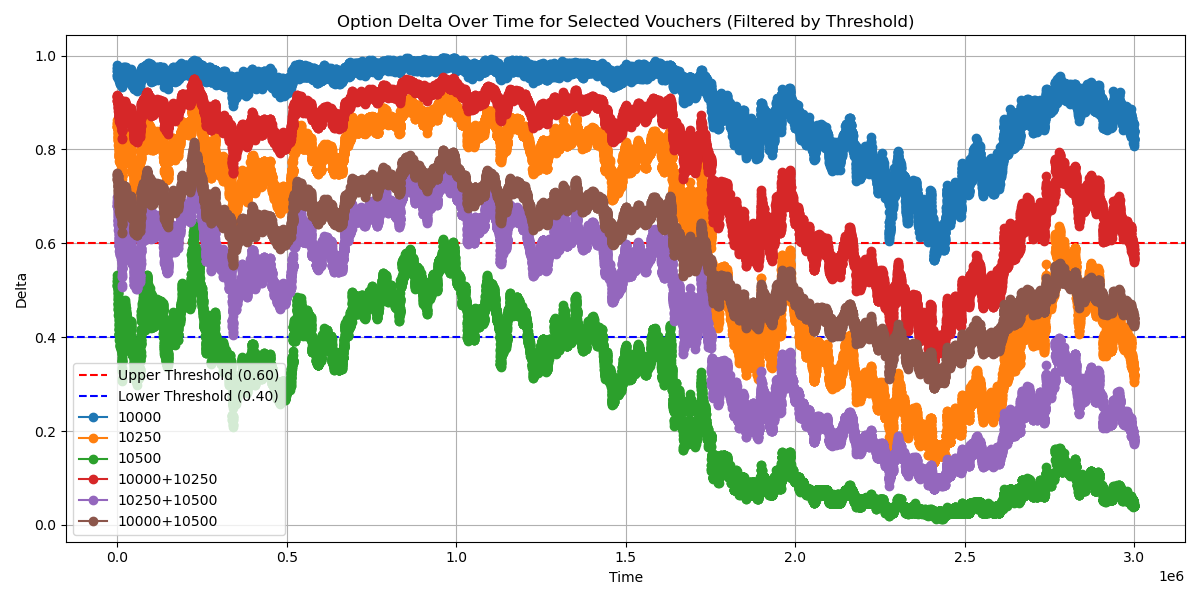

In [107]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the products with strike prices of interest.
selected_products = [
    'VOLCANIC_ROCK_VOUCHER_10000',
    'VOLCANIC_ROCK_VOUCHER_10250',
    'VOLCANIC_ROCK_VOUCHER_10500'
]

# Define the delta thresholds.
thresholdup = 0.10  # upper threshold adjustment
thresholddown = 0.10  # lower threshold adjustment

fig, ax = plt.subplots(figsize=(12, 6))

# Determine threshold boundary values.
upper_threshold = 0.5 + thresholdup
lower_threshold = 0.5 - thresholddown

# Plot horizontal lines for the threshold boundaries.
ax.axhline(upper_threshold, color='red', linestyle='--', 
           label=f'Upper Threshold ({upper_threshold:.2f})')
ax.axhline(lower_threshold, color='blue', linestyle='--', 
           label=f'Lower Threshold ({lower_threshold:.2f})')

# Loop over selected products, load the CSV file, and plot filtered delta values.
# Loop over selected products, load the CSV file, and store the dataframe in the list.
data_voucher = []
for product in selected_products:
    filename = f"{product}_iv_delta_record.csv"
    df = pd.read_csv(filename, index_col=0, parse_dates=True)
    data_voucher.append(df)
    
    # Filter the delta column to only include values within the specified threshold range.
    #data = data[(data['delta'] > lower_threshold) & (data['delta'] < upper_threshold)]
    
    #ax.plot(data_voucher[i].index, data_voucher[i]['delta'], marker='o', linestyle='-', label=product)
ax.plot(data_voucher[0].index, data_voucher[0]['delta'], marker='o', linestyle='-', label='10000') 
ax.plot(data_voucher[1].index, data_voucher[1]['delta'], marker='o', linestyle='-', label='10250') 
ax.plot(data_voucher[2].index, data_voucher[2]['delta'], marker='o', linestyle='-', label='10500') 
ax.plot(data_voucher[0].index, (data_voucher[0]['delta']+data_voucher[1]['delta'])/2, marker='o', linestyle='-', label='10000+10250')
ax.plot(data_voucher[0].index, (data_voucher[1]['delta']+data_voucher[2]['delta'])/2, marker='o', linestyle='-', label='10250+10500')
ax.plot(data_voucher[0].index, (data_voucher[0]['delta']+data_voucher[2]['delta'])/2, marker='o', linestyle='-', label='10000+10500')
ax.set_title('Option Delta Over Time for Selected Vouchers (Filtered by Threshold)')
ax.set_ylabel('Delta')
ax.set_xlabel('Time')
ax.grid(True)
ax.legend()
plt.tight_layout()
plt.show()

In [55]:
%matplotlib ipympl

/var/folders/n2/thbk5_b11zl19rfgnpxvmsvh0000gn/T/ipykernel_24565/2781415165.py:27: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv(filename, index_col=0, parse_dates=True)


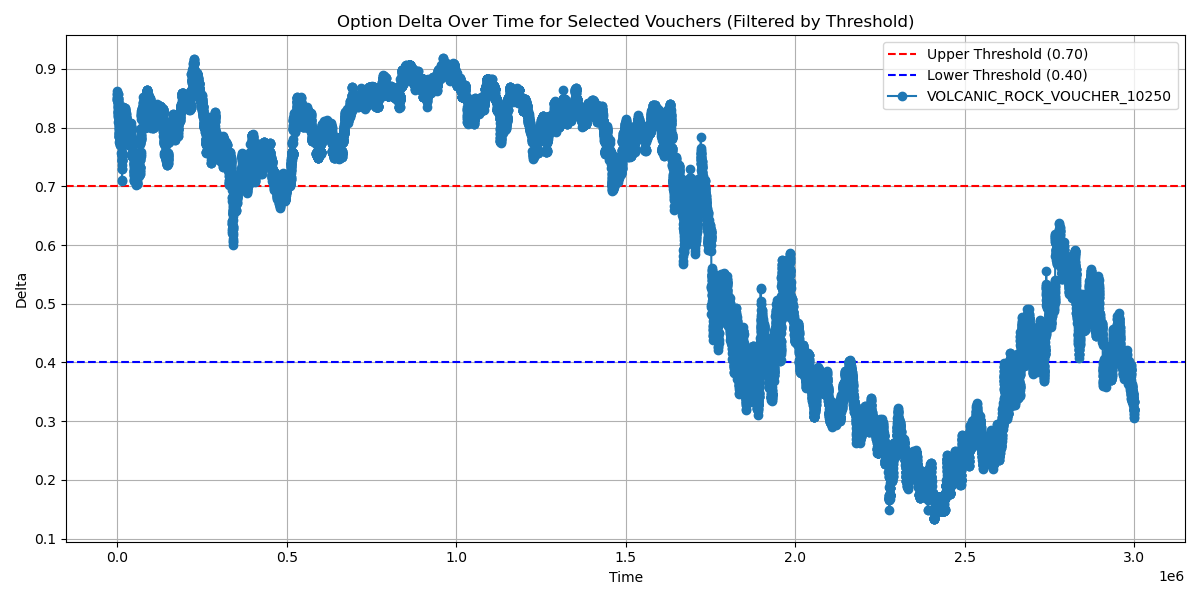

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the products with strike prices of interest.
selected_products = [
    'VOLCANIC_ROCK_VOUCHER_10250']

# Define the delta thresholds.
thresholdup = 0.20  # upper threshold adjustment
thresholddown = 0.10  # lower threshold adjustment

fig, ax = plt.subplots(figsize=(12, 6))

# Determine threshold boundary values.
upper_threshold = 0.5 + thresholdup
lower_threshold = 0.5 - thresholddown

# Plot horizontal lines for the threshold boundaries.
ax.axhline(upper_threshold, color='red', linestyle='--', 
           label=f'Upper Threshold ({upper_threshold:.2f})')
ax.axhline(lower_threshold, color='blue', linestyle='--', 
           label=f'Lower Threshold ({lower_threshold:.2f})')

# Loop over selected products, load the CSV file, and plot filtered delta values.
for product in selected_products:
    filename = f"{product}_iv_delta_record.csv"
    data = pd.read_csv(filename, index_col=0, parse_dates=True)
    
    # Filter the delta column to only include values within the specified threshold range.
    #data = data[(data['delta'] > lower_threshold) & (data['delta'] < upper_threshold)]
    
    ax.plot(data.index, data['delta'], marker='o', linestyle='-', label=product)

ax.set_title('Option Delta Over Time for Selected Vouchers (Filtered by Threshold)')
ax.set_ylabel('Delta')
ax.set_xlabel('Time')
ax.grid(True)
ax.legend()
plt.tight_layout()
plt.show()

/var/folders/n2/thbk5_b11zl19rfgnpxvmsvh0000gn/T/ipykernel_24565/204230039.py:27: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv(filename, index_col=0, parse_dates=True)


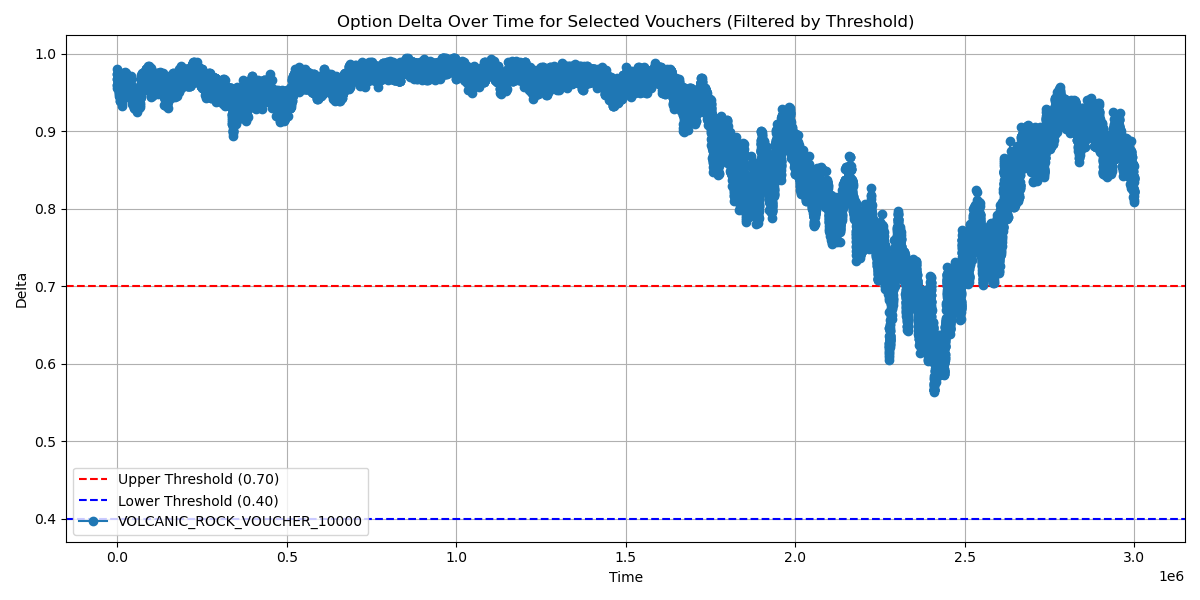

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the products with strike prices of interest.
selected_products = [
    'VOLCANIC_ROCK_VOUCHER_10000']

# Define the delta thresholds.
thresholdup = 0.20  # upper threshold adjustment
thresholddown = 0.10  # lower threshold adjustment

fig, ax = plt.subplots(figsize=(12, 6))

# Determine threshold boundary values.
upper_threshold = 0.5 + thresholdup
lower_threshold = 0.5 - thresholddown

# Plot horizontal lines for the threshold boundaries.
ax.axhline(upper_threshold, color='red', linestyle='--', 
           label=f'Upper Threshold ({upper_threshold:.2f})')
ax.axhline(lower_threshold, color='blue', linestyle='--', 
           label=f'Lower Threshold ({lower_threshold:.2f})')

# Loop over selected products, load the CSV file, and plot filtered delta values.
for product in selected_products:
    filename = f"{product}_iv_delta_record.csv"
    data = pd.read_csv(filename, index_col=0, parse_dates=True)
    
    # Filter the delta column to only include values within the specified threshold range.
    #data = data[(data['delta'] > lower_threshold) & (data['delta'] < upper_threshold)]
    
    ax.plot(data.index, data['delta'], marker='o', linestyle='-', label=product)

ax.set_title('Option Delta Over Time for Selected Vouchers (Filtered by Threshold)')
ax.set_ylabel('Delta')
ax.set_xlabel('Time')
ax.grid(True)
ax.legend()
plt.tight_layout()
plt.show()

/var/folders/n2/thbk5_b11zl19rfgnpxvmsvh0000gn/T/ipykernel_24565/3190651793.py:27: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv(filename, index_col=0, parse_dates=True)


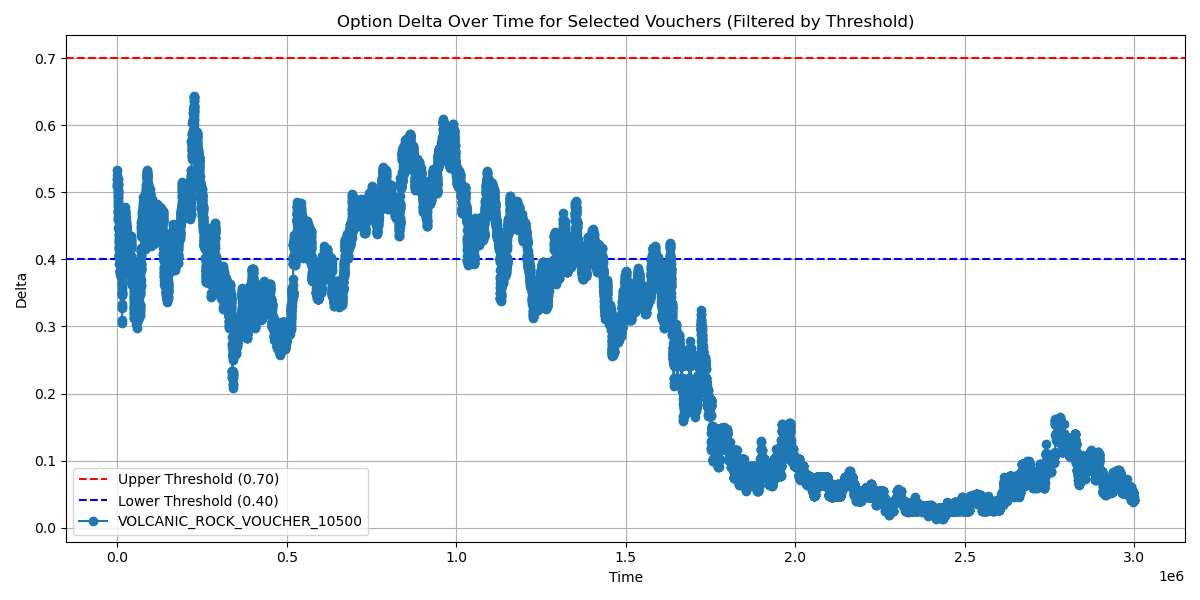

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the products with strike prices of interest.
selected_products = [
    'VOLCANIC_ROCK_VOUCHER_10500']

# Define the delta thresholds.
thresholdup = 0.20  # upper threshold adjustment
thresholddown = 0.10  # lower threshold adjustment

fig, ax = plt.subplots(figsize=(12, 6))

# Determine threshold boundary values.
upper_threshold = 0.5 + thresholdup
lower_threshold = 0.5 - thresholddown

# Plot horizontal lines for the threshold boundaries.
ax.axhline(upper_threshold, color='red', linestyle='--', 
           label=f'Upper Threshold ({upper_threshold:.2f})')
ax.axhline(lower_threshold, color='blue', linestyle='--', 
           label=f'Lower Threshold ({lower_threshold:.2f})')

# Loop over selected products, load the CSV file, and plot filtered delta values.
for product in selected_products:
    filename = f"{product}_iv_delta_record.csv"
    data = pd.read_csv(filename, index_col=0, parse_dates=True)
    
    # Filter the delta column to only include values within the specified threshold range.
    #data = data[(data['delta'] > lower_threshold) & (data['delta'] < upper_threshold)]
    
    ax.plot(data.index, data['delta'], marker='o', linestyle='-', label=product)

ax.set_title('Option Delta Over Time for Selected Vouchers (Filtered by Threshold)')
ax.set_ylabel('Delta')
ax.set_xlabel('Time')
ax.grid(True)
ax.legend()
plt.tight_layout()
plt.show()

In [71]:
df_all[df_all['product'] == 'VOLCANIC_ROCK']['mid_price'].diff()

time
0          NaN
100        7.0
200        3.0
300        4.5
400       -8.0
          ... 
2999500    1.5
2999600   -1.0
2999700    0.0
2999800    0.5
2999900   -1.0
Name: mid_price, Length: 30000, dtype: float64

In [73]:
df_all[df_all['product'] == 'VOLCANIC_VOUCHER_10000']['mid_price'].diff()


Series([], Name: mid_price, dtype: float64)

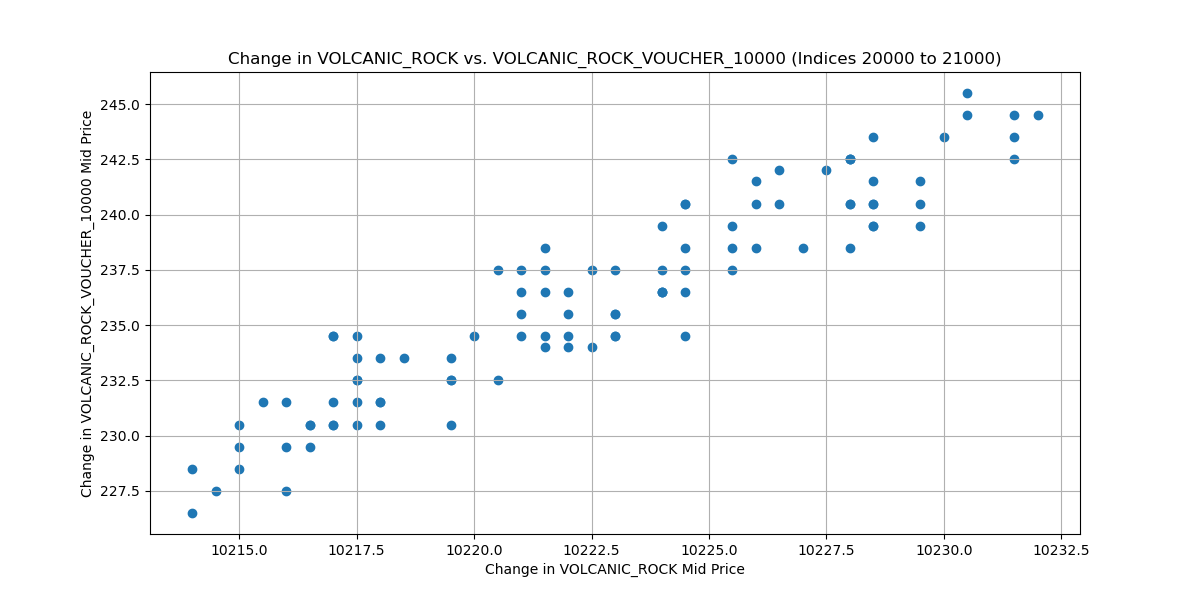

In [89]:
import matplotlib.pyplot as plt

# Compute differences in mid_price for each product.
rock_diff = df_all[df_all['product'] == 'VOLCANIC_ROCK']['mid_price']
voucher_diff = df_all[df_all['product'] == 'VOLCANIC_ROCK_VOUCHER_10000']['mid_price']

# Subset the series to the desired rows.
rock_subset = rock_diff.iloc[20000:20100]
voucher_subset = voucher_diff.iloc[20000:20100]

# Create a scatter plot.
plt.figure(figsize=(12, 6))
plt.scatter(rock_subset, voucher_subset)
plt.title('Change in VOLCANIC_ROCK vs. VOLCANIC_ROCK_VOUCHER_10000 (Indices 20000 to 21000)')
plt.xlabel('Change in VOLCANIC_ROCK Mid Price')
plt.ylabel('Change in VOLCANIC_ROCK_VOUCHER_10000 Mid Price')
plt.grid(True)
plt.show()

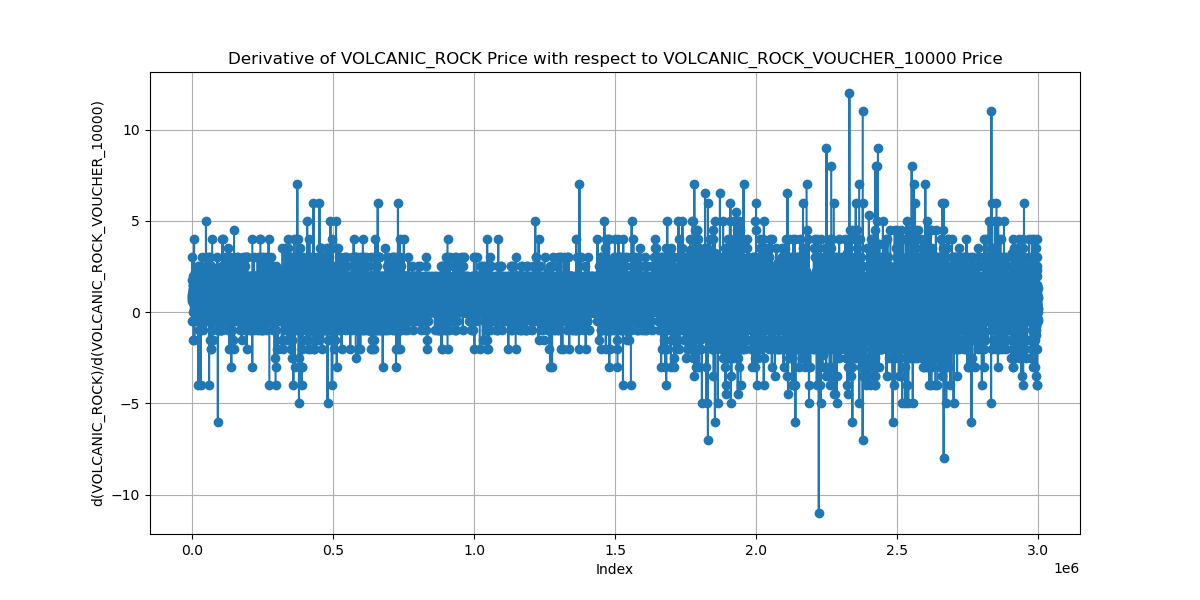

In [77]:
import matplotlib.pyplot as plt
import numpy as np

# Compute differences in mid_price for each product.
rock_diff = df_all[df_all['product'] == 'VOLCANIC_ROCK']['mid_price']
voucher_diff = df_all[df_all['product'] == 'VOLCANIC_ROCK_VOUCHER_10000']['mid_price'].diff()

# Remove NaN values that result from diff().
rock_diff = rock_diff.dropna()
voucher_diff = voucher_diff.dropna()

# Make sure the indices align (this code assumes they do)
derivative = rock_diff / voucher_diff

# Alternatively, you could do a more robust computation avoiding division by zero:
# derivative = np.where(voucher_diff != 0, rock_diff / voucher_diff, np.nan)

# Create a plot.
plt.figure(figsize=(12, 6))
plt.plot(derivative, marker='o', linestyle='-')
plt.title('Derivative of VOLCANIC_ROCK Price with respect to VOLCANIC_ROCK_VOUCHER_10000 Price')
plt.xlabel('Index')
plt.ylabel('d(VOLCANIC_ROCK)/d(VOLCANIC_ROCK_VOUCHER_10000)')
plt.grid(True)
plt.show()

## Volatility curve

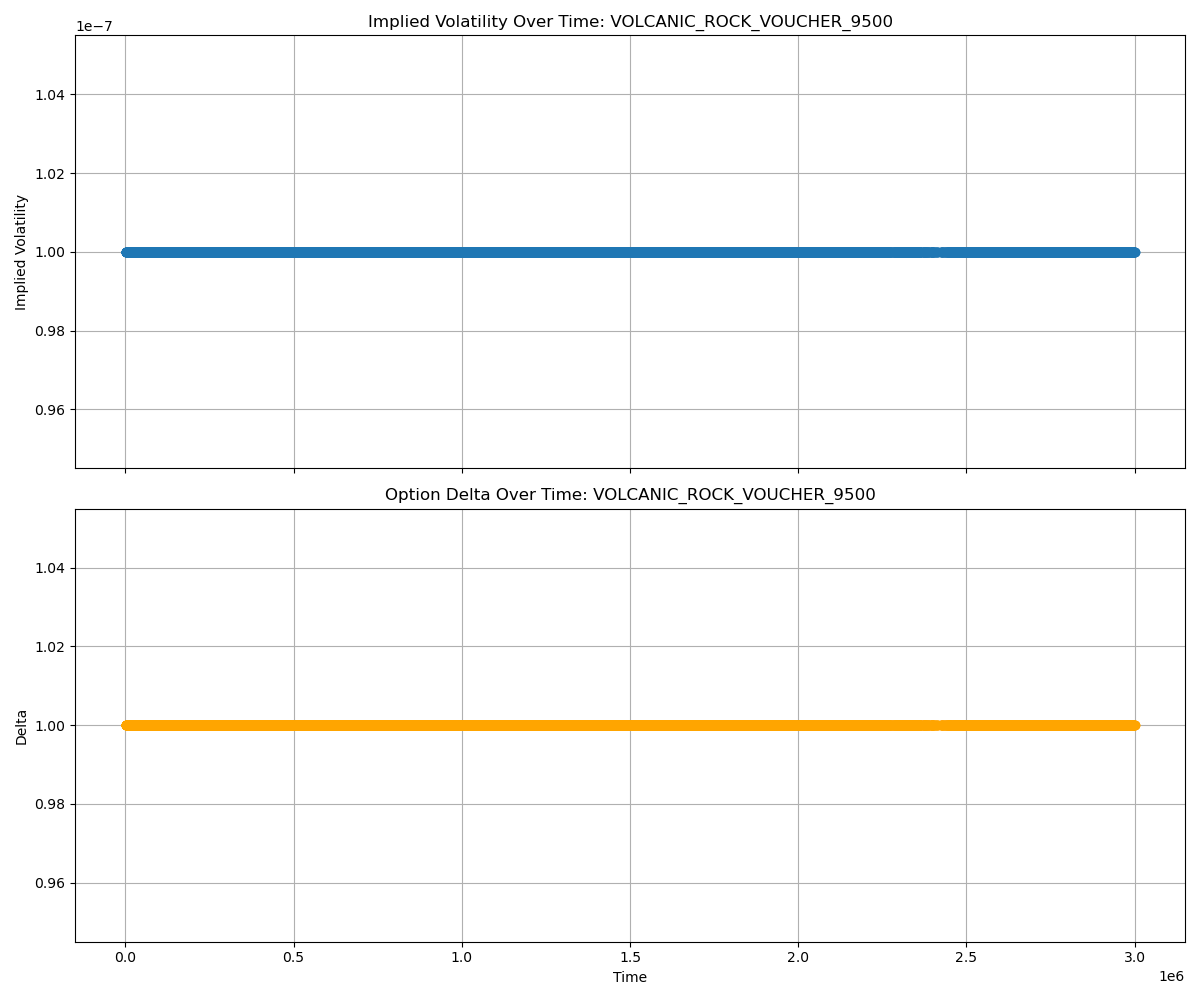

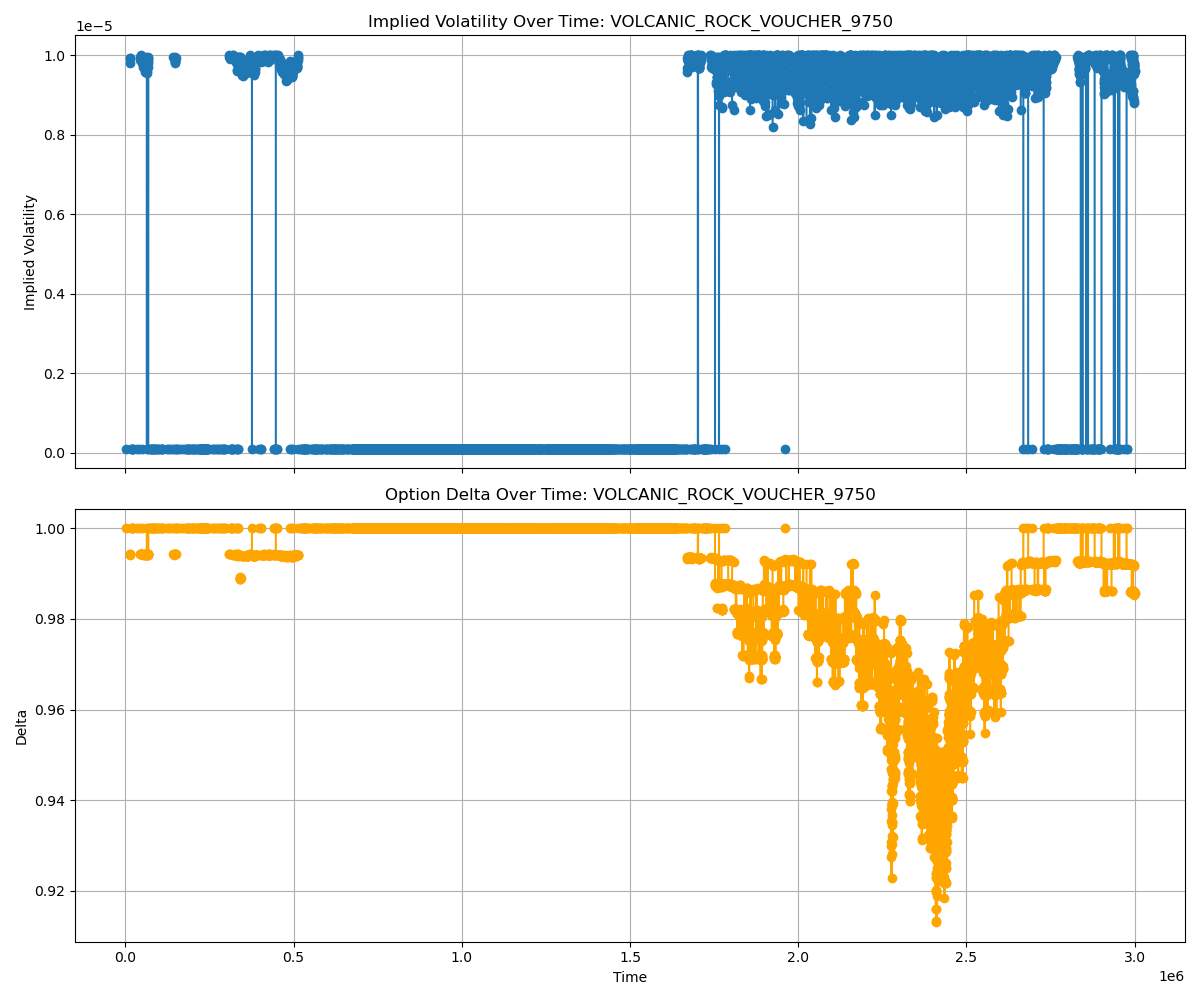

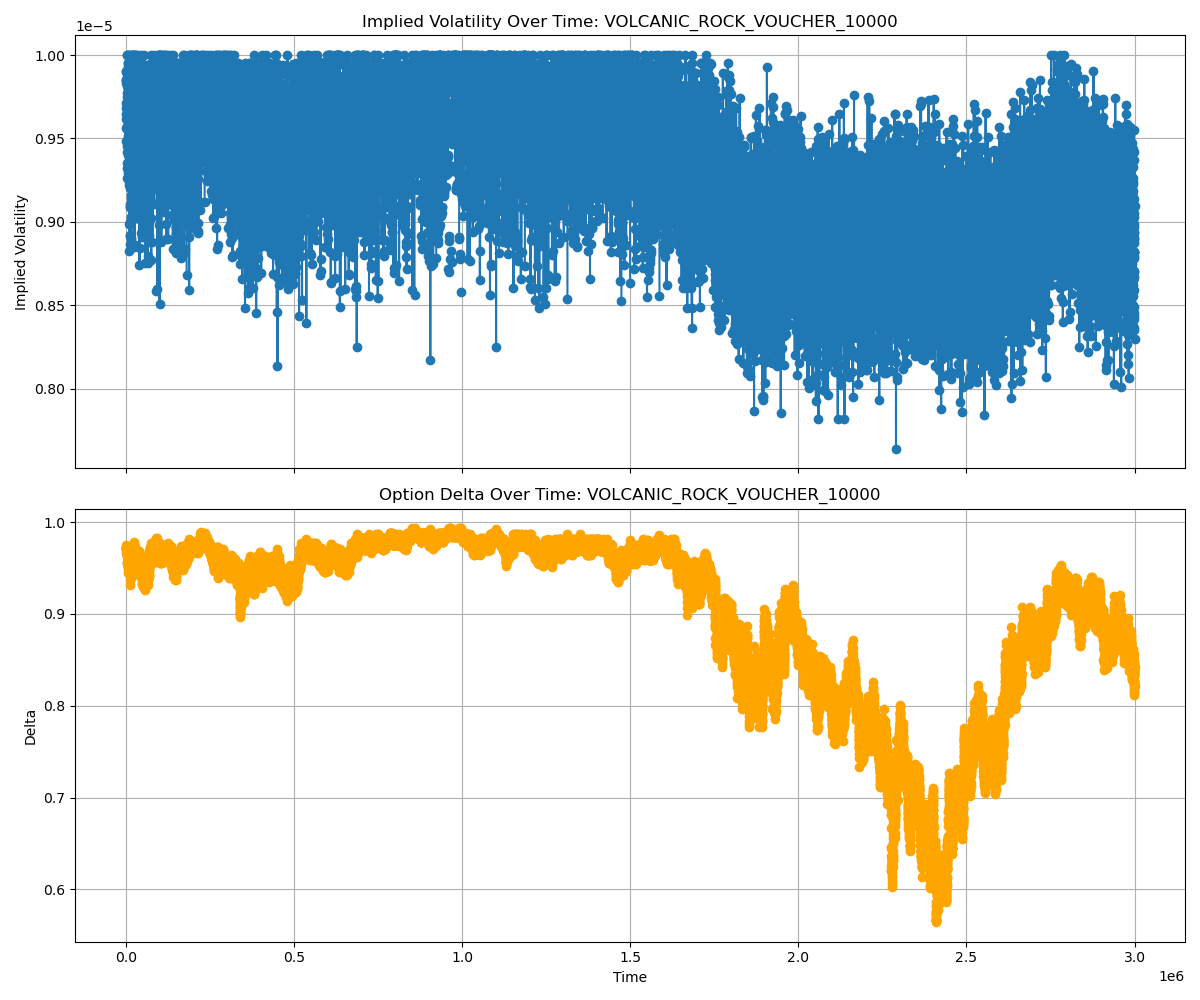

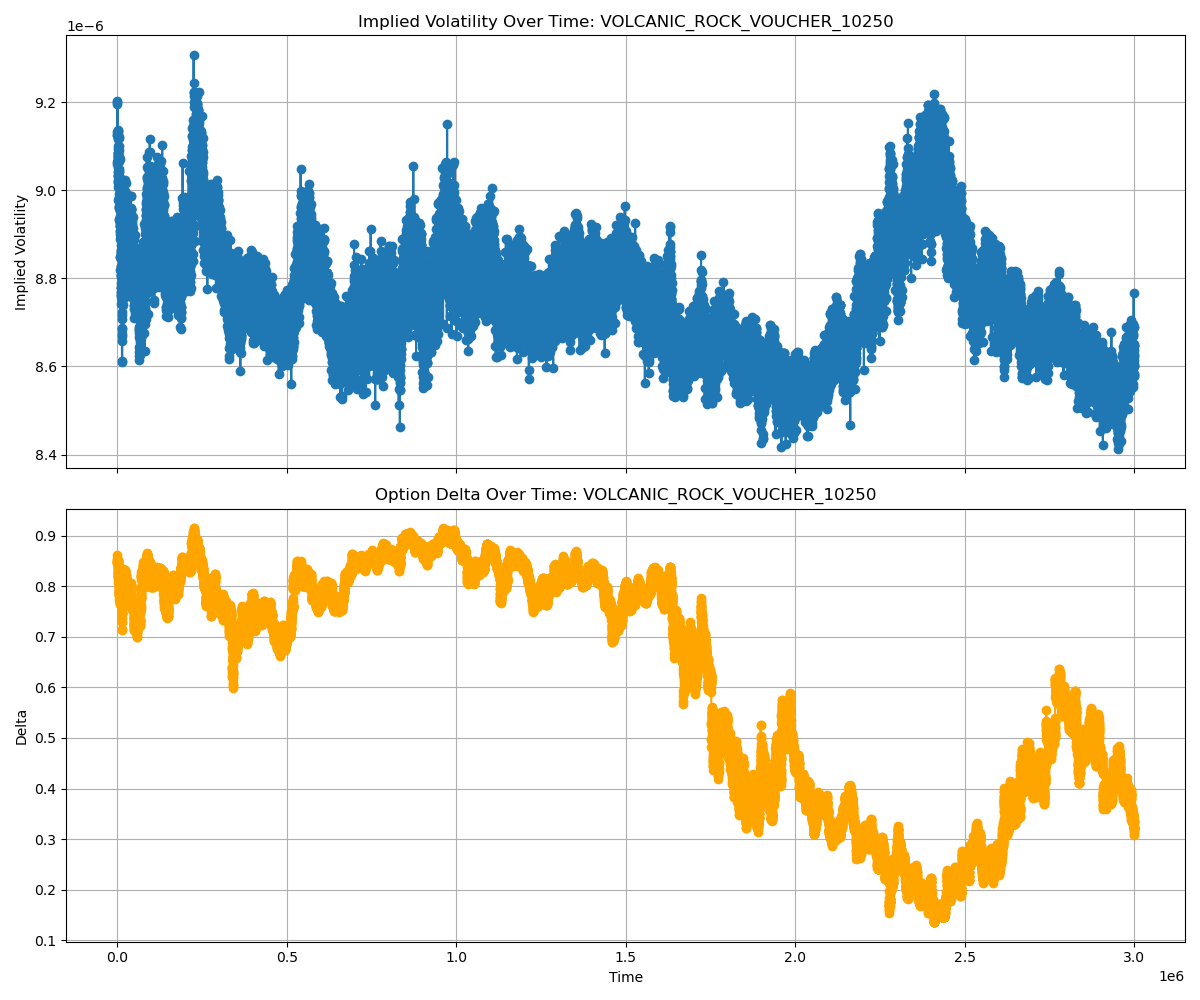

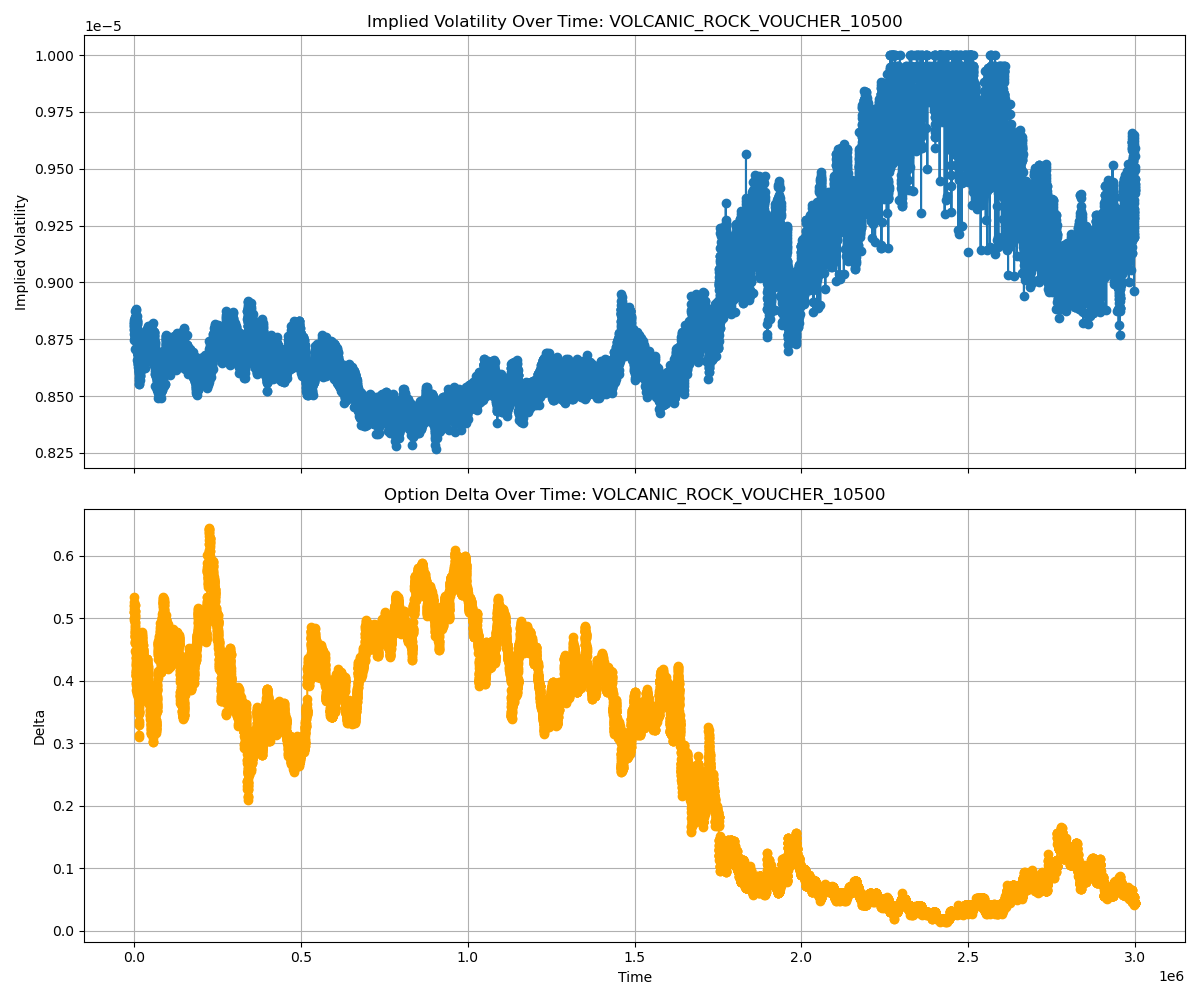

In [157]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.optimize import brentq

# Black-Scholes call option pricing function.
def bs_call_price(S, K, T, r, sigma):
    """
    Compute the Black-Scholes price for a European call option.
    
    Parameters:
      S: underlying price
      K: strike price
      T: time to maturity (in years)
      r: risk-free interest rate (annualized)
      sigma: volatility (annualized)
    
    Returns:
      call option price
    """
    if T <= 0:
        # Option has expired.
        return max(S - K, 0)
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)

# Function to calculate implied volatility via numerical inversion.
def implied_vol(S, K, T, r, market_price, tol=1e-7):
    """
    Compute the implied volatility using numerical inversion of the Black-Scholes formula.
    
    Parameters:
      S: underlying price
      K: strike price
      T: time to maturity (in years)
      r: risk-free interest rate (annualized)
      market_price: observed market price of the option
      tol: tolerance for the numerical solver
    
    Returns:
      implied volatility (sigma) or np.nan if unable to solve.
    """
    def objective(sigma):
        return bs_call_price(S, K, T, r, sigma) - market_price

    try:
        implied_sigma = brentq(objective, 1e-7, 1e-5, xtol=tol)
    except ValueError:
        implied_sigma = np.nan
    return implied_sigma

# Function to compute the option delta.
def call_delta(S, K, T, r, sigma):
    """
    Compute the call option delta (using N(d1)) from the Black-Scholes formula.
    
    Parameters:
      S: underlying price
      K: strike price
      T: time to maturity (in years)
      r: risk-free interest rate (annualized)
      sigma: volatility (annualized)
    
    Returns:
      option delta.
    """
    if T <= 0 or sigma == 0:
        return 1.0 if S > K else 0.0
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    return norm.cdf(d1)

# Assumptions / Parameters
# List of voucher products along with their strike prices.
vouchers = [
    ('VOLCANIC_ROCK_VOUCHER_9500', 9500),
    ('VOLCANIC_ROCK_VOUCHER_9750', 9750),
    ('VOLCANIC_ROCK_VOUCHER_10000', 10000),
    ('VOLCANIC_ROCK_VOUCHER_10250', 10250),
    ('VOLCANIC_ROCK_VOUCHER_10500', 10500)
]
r = 0.00   # Annualized risk-free interest rate (adjust if needed)

# Set maturity to 7 days from now (using your convention).
maturity_date = df_all.index[0] + 10000 * 100 * 7

# Extract underlying prices.
underlying = df_all[df_all['product'] == 'VOLCANIC_ROCK']['mid_price']

# Loop through each voucher and compute IV and delta.
for product, K in vouchers:
    option = df_all[df_all['product'] == product]['mid_price']
    
    # Combine underlying and option mid prices into a single DataFrame.
    data = pd.DataFrame({
        'underlying': underlying,
        'option': option  # This is the observed mid_price for the option.
    }).dropna()
    
    # Compute time to maturity (in years) for each observation.
    # Ensure that T is in years if Black-Scholes expects annualized volatility.
    # If your time unit is not in years, adjust the conversion accordingly.
    data['time_to_maturity'] = (maturity_date - data.index) 
    data = data[data['time_to_maturity'] > 0]
    
    # Lists to store computed implied volatility and delta.
    iv_list = []
    delta_list = []
    
    # Loop through each observation to compute IV and delta.
    for idx, row in data.iterrows():
        S = row['underlying']
        market_price = row['option']
        T = row['time_to_maturity']
        
        sigma_imp = implied_vol(S, K, T, r, market_price)
        iv_list.append(sigma_imp)
        
        if np.isnan(sigma_imp):
            delta_list.append(np.nan)
        else:
            delta_list.append(call_delta(S, K, T, r, sigma_imp))
    
    data['implied_vol'] = iv_list
    data['delta'] = delta_list
    
    # Save the mid_price as a separate column.
    data['mid_price'] = data['option']
    
    # --- Save the DataFrame to a CSV file ---
    output_filename = f"{product}_iv_delta_record.csv"
    data.to_csv(output_filename)
    
    # --- Plotting Results for this voucher ---
    fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

    # Plot Implied Volatility.
    axes[0].plot(data.index, data['implied_vol'], marker='o', linestyle='-')
    axes[0].set_title(f'Implied Volatility Over Time: {product}')
    axes[0].set_ylabel('Implied Volatility')
    axes[0].grid(True)

    # Plot Option Delta.
    axes[1].plot(data.index, data['delta'], marker='o', linestyle='-', color='orange')
    axes[1].set_title(f'Option Delta Over Time: {product}')
    axes[1].set_ylabel('Delta')
    axes[1].set_xlabel('Time')
    axes[1].grid(True)

    plt.tight_layout()
    plt.show()

/var/folders/n2/thbk5_b11zl19rfgnpxvmsvh0000gn/T/ipykernel_24565/3037771642.py:19: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv(filename, index_col=0, parse_dates=True)


KeyError: 'iv'

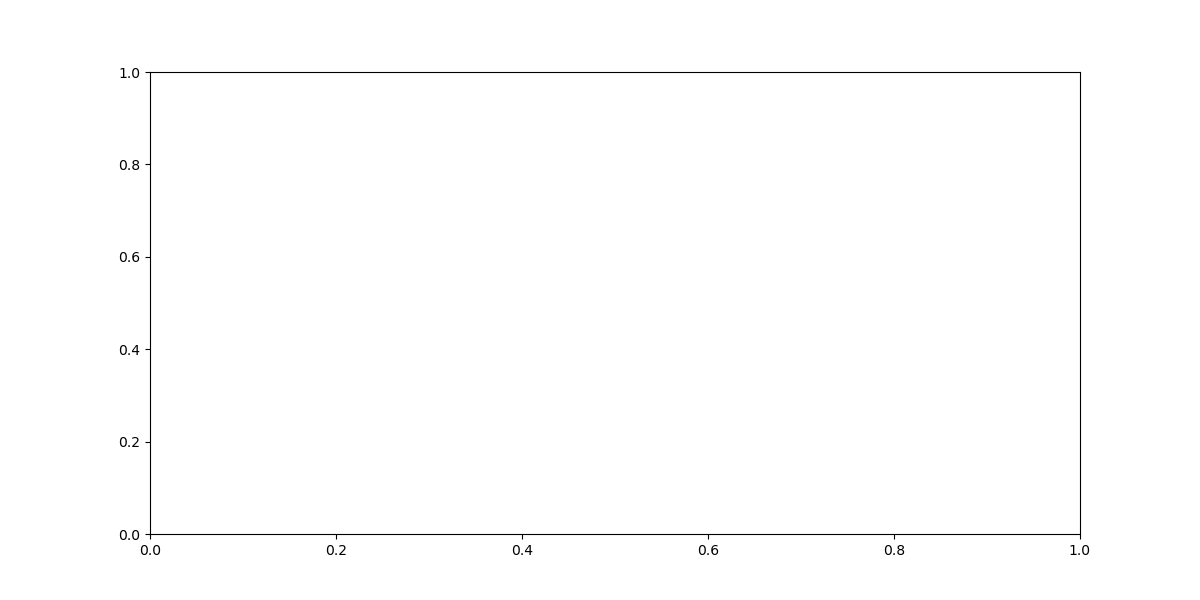

In [158]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define the products with strike prices of interest.
selected_products = [
    'VOLCANIC_ROCK_VOUCHER_9500',
    'VOLCANIC_ROCK_VOUCHER_9750'
    'VOLCANIC_ROCK_VOUCHER_10000',
    'VOLCANIC_ROCK_VOUCHER_10250',
    'VOLCANIC_ROCK_VOUCHER_10500'
]

fig, ax = plt.subplots(figsize=(12, 6))

# Loop over selected products, load the CSV file, and plot the implied volatility curve.
for product in selected_products:
    filename = f"{product}_iv_delta_record.csv"
    data = pd.read_csv(filename, index_col=0, parse_dates=True)
    
    # Optionally remove rows with zero delta values, if they are not meaningful.
    data = data[data['delta'] != 0]
    
    # Extract strike price from the product name.
    # The product name is assumed to follow the pattern: 'VOLCANIC_ROCK_VOUCHER_<strike>'
    strike = float(product.split('_')[-1])
    
    # Compute log-forward moneyness using the underlying price column 'P'.
    data["log_moneyness"] = np.log(data["mid_price"] / strike)
    
    # Plot implied volatility versus log(P/K).
    ax.plot(data["log_moneyness"], data["iv"], marker='o', linestyle='-', label=product)

ax.set_title('Implied Volatility vs log(P/K) for Selected Products')
ax.set_xlabel('log(P/K)')
ax.set_ylabel('Implied Volatility')
ax.grid(True)
ax.legend()
plt.tight_layout()
plt.show()